In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

In [2]:
df_2020 = pd.read_csv('./statement_2020.txt')
df_2021 = pd.read_csv('./statement_2021.txt')
df_2022 = pd.read_csv('./statement_2022.txt')

In [3]:
df = pd.concat([df_2020, df_2021, df_2022], axis=0, ignore_index=True)
df

,Date,Narration,Value Dat,Debit Amount,Credit Amount,Chq/Ref Number,Closing Balance
0,05/09/20,UPI-MR IRABAN DUTTA-9836709312@UPI-CBIN028231...,05/09/20,0.0,500.0,0000024914303893,500.00
1,05/09/20,UPI-IRABAN DUTTA-9836709312@UPI-CNRB0000000-02...,05/09/20,0.0,15000.0,0000024915338523,15500.00
2,05/09/20,UPI-IRABAN DUTTA-9836709312@UPI-SBIN0001055-0...,05/09/20,0.0,10000.0,0000024915339383,25500.00
3,07/09/20,UPI-MR IRABAN DUTTA-9836709312@UPI-CBIN028231...,07/09/20,0.0,20000.0,0000025111547494,45500.00
4,07/09/20,UPI-MR IRABAN DUTTA-9836709312@UPI-CBIN028231...,07/09/20,0.0,20000.0,0000025111548349,65500.00
...,...,...,...,...,...,...,...
687,24/12/22,UPI-VODAFONE IDEA LTD-VILPREKOL@PAYTM-PYTM0123...,24/12/22,99.0,0.0,0000235848452785,20559.52
688,26/12/22,UPI-UDEMY-BILLDESKPG.UDEMY@HDFCBANK-HDFC000024...,26/12/22,0.0,529.0,0000236075870203,21088.52
689,27/12/22,UPI-SHAPE UP-PAYTMQR281005050101AU3MA38LWNRE@P...,27/12/22,250.0,0.0,0000236107708162,20838.52
690,29/12/22,UPI-SATYAM CREDIT PRIVAT-Q71868491@YBL-YESB0YB...,29/12/22,387.0,0.0,0000236351660352,20451.52


In [4]:
df.columns

Index(['  Date     ',
       'Narration                                                                                                                ',
       'Value Dat', 'Debit Amount       ', 'Credit Amount      ',
       'Chq/Ref Number   ', 'Closing Balance'],
      dtype='object')

In [5]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['Date', 'Narration', 'Value Dat', 'Debit Amount', 'Credit Amount',
       'Chq/Ref Number', 'Closing Balance'],
      dtype='object')

# **Dropping rows with insignificant transaction amount**

In [6]:
df.loc[(df['Credit Amount'] < 0) | (df['Debit Amount'] < 0)]

,Date,Narration,Value Dat,Debit Amount,Credit Amount,Chq/Ref Number,Closing Balance
634,07/10/22,POS 416021XXXXXX3482 PAYPAL *DATACAMP ...,07/10/22,-1.0,0.0,0000228010331958,18947.56


In [7]:
df.loc[((df['Credit Amount'] > 0) & (df['Credit Amount'] <= 10)) | ((df['Debit Amount'] > 0) & (df['Debit Amount'] <= 10))]

,Date,Narration,Value Dat,Debit Amount,Credit Amount,Chq/Ref Number,Closing Balance
61,12/10/20,UPI-GOOGLEPAY-GOOG-PAYMENT@OKAXIS-UTIB0000553-...,12/10/20,0.00,7.00,0000028602846580,27002.58
102,18/11/20,UPI-GOOGLEPAY-GOOG-PAYMENT@OKAXIS-UTIB0000553-...,18/11/20,0.00,2.00,0000032302806581,30633.37
108,28/11/20,UPI-GOOGLEPAY-GOOG-PAYMENT@OKAXIS-UTIB0000553-...,28/11/20,0.00,7.00,0000033313142975,27222.87
120,11/12/20,UPI-GOOGLEPAY-GOOG-PAYMENT@OKAXIS-UTIB0000553-...,11/12/20,0.00,4.00,0000034600908715,29875.87
123,13/12/20,UPI-GOOGLEPAY-GOOG-PAYMENT@OKAXIS-UTIB0000553-...,13/12/20,0.00,7.00,0000034800845693,30801.87
227,14/03/21,UPI-GOOGLEPAY-GOOG-PAYMENT@OKAXIS-UTIB0000553-...,14/03/21,0.00,6.00,0000107314604239,26210.50
263,31/05/21,UPI-PAYTM-ADD-MONEY@PAYTM-PYTM0123456-11517018...,31/05/21,1.00,0.00,0000115170188111,53342.90
264,31/05/21,UPI-XXXXXX9312-PYTM0123456-115170405068-NA ...,31/05/21,10.00,0.00,0000115170405068,53332.90
265,31/05/21,REV-UPI-50100349004817-9836709312@PAYTM-115170...,31/05/21,0.00,10.00,0000115170405068,53342.90
267,07/06/21,NEFT CR-CITI0100000-PAYPAL PAYMENTS PL INR FBO...,07/06/21,0.00,1.09,CITIN21184750227,52259.99


In [8]:
rows_to_drop1 = df.loc[(df['Credit Amount'] < 0) | (df['Debit Amount'] < 0)].index
rows_to_drop1

Int64Index([634], dtype='int64')

In [9]:
rows_to_drop2 = df.loc[((df['Credit Amount'] > 0) & (df['Credit Amount'] <= 10)) | ((df['Debit Amount'] > 0) & (df['Debit Amount'] <= 10))].index
rows_to_drop2

Int64Index([ 61, 102, 108, 120, 123, 227, 263, 264, 265, 267, 268, 362, 379,
            415, 457, 617, 618, 633, 642, 678],
           dtype='int64')

In [10]:
df.drop(rows_to_drop1, axis=0, inplace=True)
df.shape

(691, 7)

In [11]:
df.drop(rows_to_drop2, axis=0, inplace=True)
df.shape

(671, 7)

# **Dropping garbage rows**

After some data exploration we found out that for the following rows:
-  money debited from the A/C was credited back because of cancellation

In [12]:
df.loc[df['Narration'].str.contains('DC EMI LOAN')]

,Date,Narration,Value Dat,Debit Amount,Credit Amount,Chq/Ref Number,Closing Balance
461,15/01/22,DC EMI LOAN# 77077035 15-01-2022 ...,15/01/22,48558.54,0.00,000000000000000,-13906.16
462,15/01/22,DC EMI LOAN# 77077035 15-01-2022 ...,15/01/22,0.00,48558.54,000000000000000,34652.38
464,17/01/22,DC EMI LOAN# 77126971 17-01-2022 ...,17/01/22,38812.44,0.00,000000000000000,-7160.06
465,17/01/22,DC EMI LOAN# 77126971 17-01-2022 ...,17/01/22,0.00,38812.44,000000000000000,31652.38


In [13]:
df.loc[df['Narration'].str.contains('NAVI GENERAL') | df['Narration'].str.contains('DHFLINSU')]

,Date,Narration,Value Dat,Debit Amount,Credit Amount,Chq/Ref Number,Closing Balance
442,23/12/21,POS 416021XXXXXX3482 NAVI GENERAL INS ...,23/12/21,4622.63,0.00,0000135777054899,13018.87
447,27/12/21,POS REF 416021******3482-12/25 DHFLINSU3 ...,27/12/21,0.00,4622.63,000000000000000,35146.50


In [14]:
can_amount = [703, 1251]
df.loc[(df['Narration'].str.contains('OYO ROOMS')) & (df['Debit Amount'].isin(can_amount) | df['Credit Amount'].isin(can_amount))]

,Date,Narration,Value Dat,Debit Amount,Credit Amount,Chq/Ref Number,Closing Balance
182,19/01/21,UPI-OYO ROOMS-OYOROOMS.RZP@HDFCBANK-HDFC000049...,19/01/21,703.0,0.0,0000101920999906,26638.29
187,25/01/21,UPI-OYO ROOMS-OYOROOMS.RZP@HDFCBANK-HDFC000049...,25/01/21,0.0,703.0,0000102515254572,28142.29
188,25/01/21,UPI-OYO ROOMS-OYOROOMS.RZP@HDFCBANK-HDFC000049...,25/01/21,1251.0,0.0,0000102515325920,26891.29
189,25/01/21,UPI-OYO ROOMS-OYOROOMS.RZP@HDFCBANK-HDFC000049...,25/01/21,0.0,1251.0,0000102519445970,28142.29


In [15]:
garbage_rows1 = df.loc[df['Narration'].str.contains('DC EMI LOAN')].index
garbage_rows2 = df.loc[df['Narration'].str.contains('NAVI GENERAL') | df['Narration'].str.contains('DHFLINSU')].index
garbage_rows3 = df.loc[(df['Narration'].str.contains('OYO ROOMS')) & (df['Debit Amount'].isin(can_amount) | df['Credit Amount'].isin(can_amount))].index

In [16]:
df.drop(garbage_rows1, axis=0, inplace=True)
df.drop(garbage_rows2, axis=0, inplace=True)
df.drop(garbage_rows3, axis=0, inplace=True)
df.shape

(661, 7)

# **Data Cleaning**

## **Feature: Date**

In [17]:
df['Day'] = df['Value Dat'].apply(lambda x: int(x.split('/')[0]))
df['Month'] = df['Value Dat'].apply(lambda x: int(x.split('/')[1]))
df['Year'] = df['Value Dat'].apply(lambda x: int(('').join([str(20), x.split('/')[2].strip()])))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 691
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             661 non-null    object 
 1   Narration        661 non-null    object 
 2   Value Dat        661 non-null    object 
 3   Debit Amount     661 non-null    float64
 4   Credit Amount    661 non-null    float64
 5   Chq/Ref Number   661 non-null    object 
 6   Closing Balance  661 non-null    float64
 7   Day              661 non-null    int64  
 8   Month            661 non-null    int64  
 9   Year             661 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 56.8+ KB


## **Feature: Narration**

### **Classifying transaction type:**
1. UPI
2. POS
3. ATM
4. Netbanking
5. Automated Transaction

In [19]:
def classify_transac_type(pymt_str):
    pymt_str = pymt_str.strip()
    pymt_type = ''
    if 'UPI-' in pymt_str:
        pymt_type = 'UPI'
    elif 'POS ' in pymt_str or 'POS-' in pymt_str:
        pymt_type = 'POS'  
    elif 'NWD-' in pymt_str or 'ATW-' in pymt_str or 'EAW-' in pymt_str:
        pymt_type = 'ATM Withdrawl'
    elif 'RTGS' in pymt_str or 'IMPS' in pymt_str:
        pymt_type = 'NetBanking'
    else: 
        pymt_type = 'Automated Transaction'
    return pymt_type


df['Transaction_Type'] = df['Narration'].apply(classify_transac_type)
df['Transaction_Type'].value_counts()

UPI                      391
POS                      164
Automated Transaction     70
ATM Withdrawl             32
NetBanking                 4
Name: Transaction_Type, dtype: int64

### **Classifying transaction details (coarse):**
1. We want to extract transaction details from the 'Narration' feature
2. After some initial analysis, we implement different strategies to extract the details for different type of payments
3. UPI and POS type of transactions will be tackled in two seperate ways
4. All other kinds of transaction (Automated Transaction, NetBanking, ATM Withdrawl) are left as it is

In [20]:
# df.loc[df['Transaction_Type'] == 'UPI', 'Narration'].value_counts()

In [21]:
# df.loc[df['Transaction_Type'] == 'POS', 'Narration'].value_counts()

In [22]:
# df.loc[df['Transaction_Type'] == 'Automated Transaction', 'Narration'].value_counts()

In [23]:
def classify_transaction_details_coarse(df_x):
    details = ''
    if df_x['Transaction_Type'] == 'UPI':
        details = df_x['Narration'].strip().split('-')[1]
    elif df_x['Transaction_Type'] == 'POS':
        if 'CRV POS-' in df_x['Narration']:
            details = 'FLIPKART'
        else:
            details = (' ').join(df_x['Narration'].strip().split()[2:])    
    else:
        details = df_x['Narration']
    return details

df['Transaction_Details_Coarse'] = df[['Transaction_Type', 'Narration']].apply(classify_transaction_details_coarse, axis=1)

### **Classifying transaction details (fine):**

1. We clean the data further by removing unwanted words and removing edge cases
2. The purpose is to create categories to understand the spending habits and for doing that this step is necessary

In [24]:
# df.loc[df['Transaction_Type'] == 'UPI', 'Transaction_Details_Coarse'].value_counts()[120:150]

In [25]:
# df.loc[df['Transaction_Type'] == 'POS', 'Transaction_Details_Coarse'].value_counts()

In [26]:
# df.loc[df['Transaction_Type'] == 'Automated Transaction', 'Transaction_Details_Coarse'].value_counts()

In [27]:
# df.loc[df['Transaction_Type'] == 'ATM Withdrawl', 'Transaction_Details_Coarse'].value_counts()

In [28]:
# df.loc[df['Transaction_Type'] == 'NetBanking', 'Transaction_Details_Coarse'].value_counts()

In [29]:
def classify_transaction_details_fine(df_x):
    details = ''
    if df_x['Transaction_Type'] == 'UPI':
        unwanted_words_upi = ['ACROPO', 'AN', 'AVE', 'AND', 'BI', 'BEVE', 'BEAUTY', 'CATE', 'CO', 'CONNECTOR', 'GREWA', 'IND', 'K', 'KOLKAT', 'KOL', 'LIMI', 'LIMITE', 
                              'LTD', 'LLP', 'L', 'LL', 'MR', 'MS', 'MRS', 'MOU', 'MARKETPLACE', 'OR', 'PV', 'PVT', 'P', 'PR', 'PRIVA', 'PERSONA', 'PRIVAT', 'PARK',  
                              'PROPERTY', 'PRIV', 'PRIVATE', 'RB', 'RESTA', 'RECHARGE', 'S', 'STREET', 'SOUTHE', 'SOUTHERN',  'SALON', 'SERVI', 'SOFTWARE', 
                              'SELLER', 'SERVIC', 'UG', 'UPI',  'WEB']
        lst_upi = [word.strip() for word in df_x['Transaction_Details_Coarse'].split()]
        details = (' ').join([word for word in lst_upi if word not in unwanted_words_upi])
    elif df_x['Transaction_Type'] == 'POS':
        unwanted_words_pos = ['0841955', '0841952', '429', 'AND', 'A', 'AN', 'BA', 'BR', 'ESS', 'BEAUTY', 'BIDHAN', 'DIAGNOS', 'ENTERTAI', 'INDI', 'INTERNE', 
                              'IND', 'INDIA', 'INC', 'KITCH', 'LTD', 'MEDIA', 'N', 'PRI', 'PV', 'PVT', 'P', 'PRIVA', 'PAYPAL', 'PAYMENT', 'RESTAU', 'RESTAUR', 
                              'RESTAURA', 'S', 'SALON', 'WM01', 'WORL', 'WWW']
        lst_pos = [word.strip().strip('*').strip('.') for word in df_x['Transaction_Details_Coarse'].split()]
        details = (' ').join([word for word in lst_pos if word not in unwanted_words_pos])
    elif df_x['Transaction_Type'] == 'Automated Transaction':
        if 'SPOTIFY' in df_x['Transaction_Details_Coarse']:
            details = 'SPOTIFY'
        elif 'NETFLIX' in df_x['Transaction_Details_Coarse']:
            details = 'NETFLIX'
        elif 'BIRLALIFEINS' in df_x['Transaction_Details_Coarse'] or 'ADITYA BIRLA SUN LIFE' in df_x['Transaction_Details_Coarse']:
            details = 'TAX SAVING INSURANCE'
        elif 'ACH D- POLICYBAZAAR' in df_x['Transaction_Details_Coarse'] or 'KQRHW5UJAV52NOW2CI' in df_x['Transaction_Details_Coarse']:
            details = 'TERM INSURANCE'
        elif ('DC 1019060017662595' in df_x['Transaction_Details_Coarse']) or ('DC 1019060017622078' in df_x['Transaction_Details_Coarse']):
            details = 'HEALTH INSURANCE'
        elif 'CREDIT INTEREST' in df_x['Transaction_Details_Coarse']:
            details = 'A/C INTEREST CREDIT'
        elif '11302000005643-TPT-REFUND' in df_x['Transaction_Details_Coarse']:
            details = 'DARJEELING HOTEL REFUND'
        elif 'JI9VDUH78TKZSX/RAZPINTERVIEWBIT' in df_x['Transaction_Details_Coarse']:
            details = 'SCALER'
        elif 'ACH C- CAYPD4539D' in df_x['Transaction_Details_Coarse']:
            details = 'IT TAX REBATE FY22'
        elif 'CARD RE-ISSUANCE' in df_x['Transaction_Details_Coarse']:
            details = 'DEBIT CARD FEE'
        elif 'MC CHARGES INCL' in df_x['Transaction_Details_Coarse']:
            details = 'CHEQUE BOOK FEE'
        elif 'CHQ PAID-MICR CTS' in df_x['Transaction_Details_Coarse']:
            # Created ICICI A/C for self, paid cheque to deposit initial amount
            details = 'SELF'    
    else:
        details = 'SELF'
    return details

df['Transaction_Details_Fine'] = df[['Transaction_Type', 'Transaction_Details_Coarse']].apply(classify_transaction_details_fine, axis=1)

In [30]:
# df.loc[df['Transaction_Type'] == 'UPI', 'Transaction_Details_Fine'].value_counts()[120:]

In [31]:
# Re-adjusting a few names so that it helps to categorize Transactions Details 
df.loc[df['Transaction_Details_Fine'] == 'IRABAN DUTTA', 'Transaction_Details_Fine'] = 'SELF'
df.loc[df['Transaction_Details_Fine'] == 'INNOVATIVE RETAIL', 'Transaction_Details_Fine'] = 'BIGBASKET'
df.loc[df['Transaction_Details_Fine'] == 'MOULINROUGEPVTLTD', 'Transaction_Details_Fine'] = 'MOULINROUGE'
df.loc[df['Transaction_Details_Fine'] == 'INSTAMOJO TECHNOLOGI', 'Transaction_Details_Fine'] = 'INSTAMOJO TECHNOLOGIES'
df.loc[df['Transaction_Details_Fine'] == 'SACREDWILDSPRIVATELI', 'Transaction_Details_Fine'] = 'SACRED WILDS'
df.loc[df['Transaction_Details_Fine'] == 'CASHFREEPAYMENTSINDI', 'Transaction_Details_Fine'] = 'CASHFREEPAYMENTS'
df.loc[df['Transaction_Details_Fine'] == 'BAJAAOCOM', 'Transaction_Details_Fine'] = 'BAJAAO'
df.loc[df['Transaction_Details_Fine'] == '66 2B THE GUEST HOUS', 'Transaction_Details_Fine'] = '66 2B THE GUEST HOUSE'
df.loc[df['Transaction_Details_Fine'] == 'MOCAMBOMOCAMBO', 'Transaction_Details_Fine'] = 'MOCAMBO'
df.loc[df['Transaction_Details_Fine'] == 'PONYUP', 'Transaction_Details_Fine'] = 'PONY UP'
df.loc[df['Transaction_Details_Fine'] == 'SPENCERS RETAIL', 'Transaction_Details_Fine'] = 'SPENCERS'
df.loc[df['Transaction_Details_Fine'] == 'THE CHAIWALASOUTHER', 'Transaction_Details_Fine'] = 'THE CHAIWALA'
df.loc[df['Transaction_Details_Fine'] == 'UBER INDIA SYSTEMS', 'Transaction_Details_Fine'] = 'UBER'
df.loc[df['Transaction_Details_Fine'] == 'ADD MONEY TO WALLET', 'Transaction_Details_Fine'] = 'VODAFONE IDEA'
df.loc[df['Transaction_Details_Fine'] == 'PAYTM', 'Transaction_Details_Fine'] = 'UBER'
df.loc[df['Transaction_Details_Fine'] == 'EDUCATIONPAYTM', 'Transaction_Details_Fine'] = 'IXAMBEE'
df.loc[df['Transaction_Details_Fine'] == 'YESBANK', 'Transaction_Details_Fine'] = 'AMAZON'
df.loc[df['Transaction_Details_Fine'] == 'EASE MY TRIP', 'Transaction_Details_Fine'] = 'FLIGHT'
df.loc[df['Transaction_Details_Fine'] == 'INDIAN RAILWAYS', 'Transaction_Details_Fine'] = 'IRCTC'
df.loc[df['Transaction_Details_Fine'] == 'IRCTC APP', 'Transaction_Details_Fine'] = 'IRCTC'
df.loc[df['Transaction_Details_Fine'] == 'PACK SAVE RETURN', 'Transaction_Details_Fine'] = 'RAZORPAY'
df.loc[(df['Transaction_Details_Fine'] == 'OSL MOTOCORP') & (df['Transaction_Type'] == 'UPI'), 'Transaction_Details_Fine'] = 'CAR INSURANCE' 

In [32]:
# df.loc[df['Transaction_Type'] == 'POS', 'Transaction_Details_Fine'].value_counts()[60:]

In [33]:
# Re-adjusting a few names so that it helps to categorize Transactions Details 
df.loc[df['Transaction_Details_Fine'] == 'APOLLO GLENEAGLE', 'Transaction_Details_Fine'] = 'APOLLO HOSPITAL'
df.loc[df['Transaction_Details_Fine'] == 'APPLE.COM/BILL', 'Transaction_Details_Fine'] = 'APPLE'
df.loc[df['Transaction_Details_Fine'] == 'DRIVE IN I', 'Transaction_Details_Fine'] = 'DRIVE IN'
df.loc[df['Transaction_Details_Fine'] == '416021******1563-09/20 WWW.SWIGG', 'Transaction_Details_Fine'] = 'SWIGGY'
df.loc[df['Transaction_Details_Fine'] == 'SWIGGY IN', 'Transaction_Details_Fine'] = 'SWIGGY'
df.loc[df['Transaction_Details_Fine'] == 'PAYU-WWW.SWIGGY', 'Transaction_Details_Fine'] = 'SWIGGY'
df.loc[df['Transaction_Details_Fine'] == 'MSW*BHAWANA', 'Transaction_Details_Fine'] = 'MSW BHAWANA'
df.loc[df['Transaction_Details_Fine'] == 'MSW*GLOBAL', 'Transaction_Details_Fine'] = 'MSW GLOBAL'
df.loc[df['Transaction_Details_Fine'] == 'APPLEINDIA', 'Transaction_Details_Fine'] = 'APPLE'
df.loc[df['Transaction_Details_Fine'] == 'STARHEALTHANDALL', 'Transaction_Details_Fine'] = 'HEALTH INSURANCE'
df.loc[df['Transaction_Details_Fine'] == 'CHUNGWAH', 'Transaction_Details_Fine'] = 'CHUNG WAH'
df.loc[df['Transaction_Details_Fine'] == 'ZOMATOCOM', 'Transaction_Details_Fine'] = 'ZOMATO'
df.loc[df['Transaction_Details_Fine'] == 'INDIGO', 'Transaction_Details_Fine'] = 'FLIGHT'
df.loc[df['Transaction_Details_Fine'] == 'PAYU PAYMENTS', 'Transaction_Details_Fine'] = 'DARJEELING HOTEL BOOKING'

In [34]:
# df.loc[df['Transaction_Type'] == 'Automated Transaction', 'Transaction_Details_Fine'].value_counts()

In [35]:
# df.loc[df['Transaction_Type'] == 'ATM Withdrawl', 'Transaction_Details_Fine'].value_counts()

In [36]:
# df.loc[df['Transaction_Type'] == 'NetBanking', 'Transaction_Details_Fine'].value_counts()

In [37]:
# df['Transaction_Details_Fine'].sort_values()[600:650]

In [38]:
# df['Transaction_Details_Fine'].value_counts().sort_index()[50:100]

In [39]:
# df.loc[df['Transaction_Details_Fine'] == 'RAUL RESTAURANT']

### **Categorize Transactions:**

In [40]:
# Defining the categories
self_friends_family = ['A/C INTEREST CREDIT', 'DIPITA PAL', 'IT TAX REBATE FY22', 'NAVONIL CHATTERJEE', 'SHREYOSI MUKHERJEE', 'SOUPTIK DAS', 'SUBHASIS MITRA', 'SELF']

insurance = ['CAR INSURANCE', 'HEALTH INSURANCE', 'TAX SAVING INSURANCE', 'TERM INSURANCE']
career_edu = ['DATACAMP', 'GEEKS CLASSES', 'IBPS BILLDESK', 'IXAMBEE', 'SCALER', 'UDEMY']

rent = ['ZOLOSTAYS']
medicine = ['APEX HOSPITEX', 'APOLLO HOSPITAL', 'APOLLO PHARMACY', 'GARIAHAT MEDICAL', 'MEDPLUS', 'RACHNA SONTHALIA', 'SATYAM CREDIT', 'SRI RAMKRISHNA', 
            'SURAKSHA', 'THE MEDICINE']
mobile_internet = ['NARAYAN CHANDRA SAHA', 'VODAFONE IDEA']
retail = ['AMAZON', 'APPLE', 'BIGBASKET', 'DUNZO', 'FLIPKART', 'HALDER HARDWARE', 'INNOVATIVE RETAIL', 'MSM RETAIL', 'RAZORPAY', 'SPENCERS', 
          'SYSTEMATIX', 'URBAN LADDER', 'VISAGE LINES', 'SACRED WILDS']
grooming = ['BHARGOB BARIK', 'PONY UP', 'SHAPE UP', 'TONI GUY', ]


clothes_accessories = ['AMAZING FASHIONS', 'BIG BAZAR', 'DA MILANO', 'DECATHLON SPORTS', 'HIMANSHU DUTTA', 'LENSKART SOLUTIONS', 'LIFE STYLE', 
                       'MADURA GARMENTS', 'MAJOR BRANDS', 'MD GARMENTS', 'MYNTRA DESIGNS', 'PANTALOONS', 'TOMMY HILFIGER', 'ZARA']

entertainment = ['BAJAAO', 'BOOKMYSHOW', 'HOICHOI', 'NETFLIX', 'SPOTIFY', 'THG PUBLISHING', 'TRUEFIRE']

eatout = ['ACROPOLIS', 'ANNIES FOOD', 'ASHOK PRD GUPTA', 'BAPI DAS', 'BRS ENTERTAINMENT', 'CAFE BY THE LANE', 'CAFE CONNECT', 'CAFE DE VERVE', 'CALCUTTA 64 SECTOR', 
          'CALCUTTA SPORTS', 'CHEZ PAN ORIENTAL', 'CHILIS GRILL BAR', 'CHOWMAN BALLYGUNGE', 'CHUNG WAH', 'CLUB CARPEDIEM', 'CREAM FUDGE', 'DRILL WILL CLUBS', 
          'EXQUISITE CLUBS', 'GUFRAN AZAM', 'HATARI GARIAHAT', 'I CAN FLYY', 'KFC', 'KOFFEE KOTHA', 'KWALITY', 'METRO ICE CREAM', 'MOCAMBO', 'MONKEY BAR', 'MOULINROUGE', 
          'MSW GLOBAL', 'MY BIG FAT BELLY', 'NSAG HOSPITALITY', 'OLYPUB', 'PETERCAT', 'PUBLIK', 'RAUL RESTAURANT', 'REKHA CONFECTIONERY', 'ROASTERY CAFE', 'SRIKRISHNA DAS', 
          'SWIGGY', 'TCH FOODS', 'TGIF KOLKATA', 'THE BIKERS CAFE', 'THE CHAIWALA', 'THE YELLOW TURTLE', 'TRIOS HOSPITALITY', 'TUNG FONG', 'WISE OWL THE COFFEE', 'WOW MOMO', 
          'ZOMATO']

travel = ['AAMAZE DHABA', 'ADRI HOTELS', 'AJAY KUMAR SAHA', 'AMIT MONDAL', 'ARA BY BELLEVUE', 'ASHWIN KUMAI', 'BISHU MAITY','DARJEELING HOTEL BOOKING', 
          'DARJEELING HOTEL REFUND', 'GOLDEN TIPS TEA', 'HOTEL BLUE WAVES', 'HOTEL PARK POINT', 'IBIBOGROUP', 'IRCTC', 'MAKEMYTRIP', 'MS SELECTIONS', 
          'MSW BHAWANA', 'NARAYAN ADITYA', 'OYO ROOMS', 'PANKAJ KUMAR', 'PERFECT SODA', 'PRAKASH NAYAK', 'PROSUN ROY', 'PULGER HOTELS', 'SAHEB E ALAM', 
          'SOMA SAHA', 'STAY HUB HOTEL', 'SUVENDU MANDAL', 'THE HOWRAH BRIDGE']

transport = ['FLIGHT', 'UBER']
fuel = ['B C DUTTA', 'DRIVE IN', 'GUJRAL SERVICE', 'R B TRADING']
car = ['AUTO SCAN', 'OSL MOTOCORP']

In [41]:
def categorize_transaction(trnsc_det):
    cat = ''
    if trnsc_det in self_friends_family:
        cat = 'Self, Friends & Family'
    elif trnsc_det in insurance:
        cat = 'Insurance'
    elif trnsc_det in career_edu:
        cat = 'Career & Education'
    elif trnsc_det in rent:
        cat = 'Rent'
    elif trnsc_det in medicine:
        cat = 'Medicines & Treatment'
    elif trnsc_det in retail:
        cat = 'Retail'
    elif trnsc_det in mobile_internet:
        cat = 'Mobile & Internet'
    elif trnsc_det in grooming:
        cat = 'Personal Grooming'
    elif trnsc_det in clothes_accessories:
        cat = 'Clothes & Accessories'
    elif trnsc_det in entertainment:
        cat = 'Entertainment'
    elif trnsc_det in eatout:
        cat = 'Eating-Out'
    elif trnsc_det in travel:
        cat = 'Travel & Vacation'
    elif trnsc_det in transport:
        cat = 'Public Transport'
    elif trnsc_det in fuel:
        cat = 'Fuel'
    elif trnsc_det in car:
        cat = 'Car Maintainence'
    else:
        cat = 'Miscellaneous'

    return cat

df['Transaction_Category'] = df['Transaction_Details_Fine'].apply(categorize_transaction)

In [42]:
# df['Transaction_Category'].value_counts()

In [43]:
# df.loc[(df['Year'] == 2022) & (df['Transaction_Category'] == 'Miscellaneous')]

In [44]:
# df.loc[df['Transaction_Details_Fine'] == 'VODAFONE IDEA']

# **Final dataset after cleaning:** 

In [45]:
df.head()

,Date,Narration,Value Dat,Debit Amount,Credit Amount,Chq/Ref Number,Closing Balance,Day,Month,Year,Transaction_Type,Transaction_Details_Coarse,Transaction_Details_Fine,Transaction_Category
0,05/09/20,UPI-MR IRABAN DUTTA-9836709312@UPI-CBIN028231...,05/09/20,0.0,500.0,0000024914303893,500.0,5,9,2020,UPI,MR IRABAN DUTTA,SELF,"Self, Friends & Family"
1,05/09/20,UPI-IRABAN DUTTA-9836709312@UPI-CNRB0000000-02...,05/09/20,0.0,15000.0,0000024915338523,15500.0,5,9,2020,UPI,IRABAN DUTTA,SELF,"Self, Friends & Family"
2,05/09/20,UPI-IRABAN DUTTA-9836709312@UPI-SBIN0001055-0...,05/09/20,0.0,10000.0,0000024915339383,25500.0,5,9,2020,UPI,IRABAN DUTTA,SELF,"Self, Friends & Family"
3,07/09/20,UPI-MR IRABAN DUTTA-9836709312@UPI-CBIN028231...,07/09/20,0.0,20000.0,0000025111547494,45500.0,7,9,2020,UPI,MR IRABAN DUTTA,SELF,"Self, Friends & Family"
4,07/09/20,UPI-MR IRABAN DUTTA-9836709312@UPI-CBIN028231...,07/09/20,0.0,20000.0,0000025111548349,65500.0,7,9,2020,UPI,MR IRABAN DUTTA,SELF,"Self, Friends & Family"


In [46]:
df_clean = df.loc[:, ['Value Dat', 'Day', 'Month', 'Year', 'Transaction_Type', 'Transaction_Details_Fine', 'Transaction_Category', 'Debit Amount', 'Credit Amount', 'Closing Balance']]
df_clean.rename({'Value Dat': 'Transaction_Date', 'Transaction_Details_Fine': 'Transaction_Details'}, axis=1, inplace=True)
df_clean.head()

,Transaction_Date,Day,Month,Year,Transaction_Type,Transaction_Details,Transaction_Category,Debit Amount,Credit Amount,Closing Balance
0,05/09/20,5,9,2020,UPI,SELF,"Self, Friends & Family",0.0,500.0,500.0
1,05/09/20,5,9,2020,UPI,SELF,"Self, Friends & Family",0.0,15000.0,15500.0
2,05/09/20,5,9,2020,UPI,SELF,"Self, Friends & Family",0.0,10000.0,25500.0
3,07/09/20,7,9,2020,UPI,SELF,"Self, Friends & Family",0.0,20000.0,45500.0
4,07/09/20,7,9,2020,UPI,SELF,"Self, Friends & Family",0.0,20000.0,65500.0


In [47]:
# df_clean.groupby('Transaction_Category')[['Debit Amount', 'Credit Amount']].agg(['sum'])

# **Basic observations on the Data**

### **Debit vs Credit Transactions**

In [48]:
df_clean.shape 

(661, 10)

In [49]:
debit_transactions = df_clean.loc[df_clean['Debit Amount'] > 0].shape[0]
debit_transactions

530

In [50]:
credit_transactions = df_clean.loc[df_clean['Credit Amount'] > 0].shape[0]
credit_transactions

131

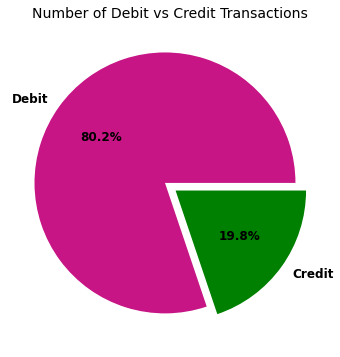

In [51]:
transaction_flow = np.array([debit_transactions, credit_transactions])
plt.figure(figsize=(15, 6))
plt.pie(transaction_flow, labels=['Debit', 'Credit'], explode=(0.05, 0.05), 
        colors=['mediumvioletred', 'green'], autopct='%.1f%%', radius=1, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Number of Debit vs Credit Transactions', fontsize=14)
plt.show()

Observations:
- We have primarily debit transactions that were made from this A/C:
- This makes sense since this bank A/C is used for running all expenses of life
- The money spent covers various facets of life, we will analyse our spending habits and spending areas later

### **How many transactions across different Transaction Modes?**

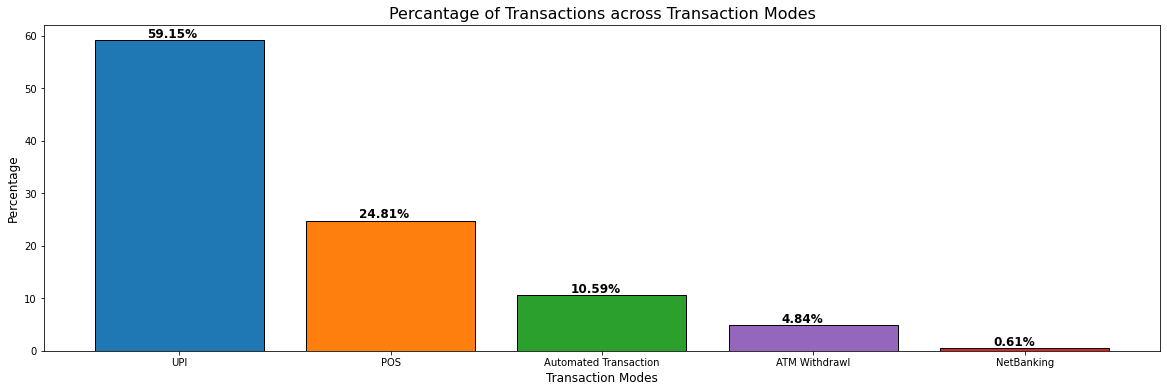

In [52]:
# order_trnsc_type = df_clean['Transaction_Type'].value_counts().index[::-1]
plt.figure(figsize=(20, 6))
plt.bar(x=df_clean['Transaction_Type'].value_counts().index, 
        height = 100 * (df_clean['Transaction_Type'].value_counts(normalize=True).values), 
        color=['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:red'], edgecolor='black', linewidth=1)
for i, data in enumerate(df_clean['Transaction_Type'].value_counts(normalize=True).values):
    plt.text(x=i-0.15, y=round(100*data, 2)+0.5, s=f'{round(100*data, 2)}%', color='black', fontsize=12, fontweight='bold')
plt.xlabel('Transaction Modes', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percantage of Transactions across Transaction Modes', fontsize=16)
plt.show()

Observations: 
- UPI (Unified Payments Interface) is the most frequent mode of transaction (60%)
- POS (Point of Sale) follows next (25%)
- The remaining 15% is made of the other modes of transaction

### **How many transactions across different Transaction Categories?**

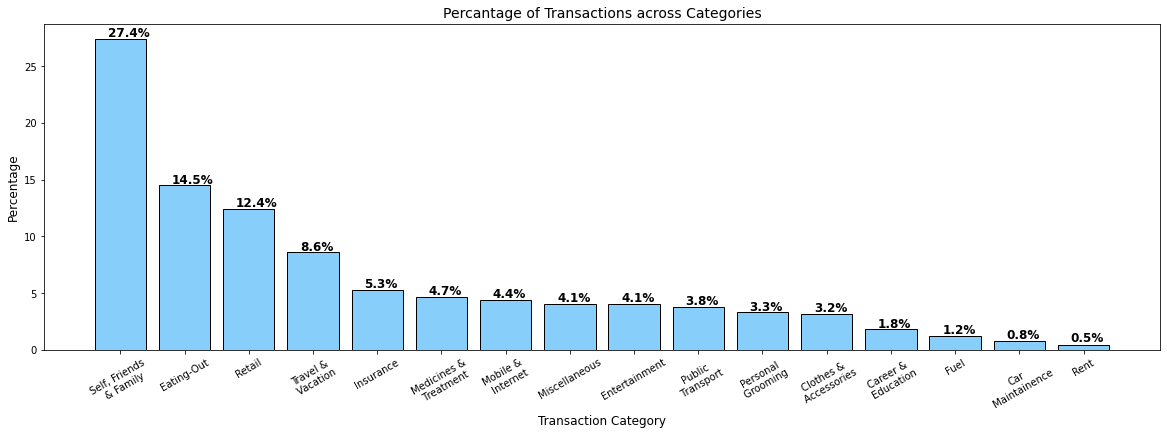

In [53]:
plt.figure(figsize=(20, 6))
plt.bar(x=df_clean['Transaction_Category'].value_counts().index, 
        height = (100 * (df_clean['Transaction_Category'].value_counts(normalize=True).values)), 
        color='lightskyblue', edgecolor='black', linewidth=1)
for i, data in enumerate(df_clean['Transaction_Category'].value_counts(normalize=True).values):
    plt.text(x=i-0.2, y=round(100*data, 1)+0.2, s=f'{round(100*data, 1)}%', color='black', fontsize=12, fontweight='bold')
# np.arange(df_clean['Transaction_Category'].value_counts().index.size)
plt.xticks(ticks=np.arange(df_clean['Transaction_Category'].value_counts().index.size), 
           labels=['Self, Friends\n & Family', 'Eating-Out', 'Retail', 'Travel &\n Vacation', 'Insurance', 'Medicines &\n Treatment', 'Mobile &\n Internet', 
                   'Miscellaneous', 'Entertainment', 'Public\n Transport', 'Personal\n Grooming', 'Clothes &\n Accessories', 'Career &\n Education', 'Fuel', 
                   'Car\n Maintainence', 'Rent'], rotation=30)
plt.xlabel('Transaction Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percantage of Transactions across Categories', fontsize=14)
plt.show()

Observations:
- Almost 27% of the transactions fall in the category: Self, Friends & Family
- Eating-out, Retail, Travel & Vacation are the categories which follow in order as far as number of transactions are concerned

# **EDA: Spending Areas and Habits**

## **Category: Self, Friends & Family**
- Some money debited from the A/C has been categorized under 'Self, Friends & Family'
- This essentially means we have transferred money to our own self (to other bank A/Cs, cash withdrawls), friends or family-members as shown below

In [54]:
debit_toSelf_toFriends = df_clean.loc[(df_clean['Debit Amount'] > 0) & (df_clean['Transaction_Category'] == 'Self, Friends & Family')].groupby('Transaction_Details')['Debit Amount'].agg(['sum', 'count']).reset_index()
debit_toSelf_toFriends

,Transaction_Details,sum,count
0,DIPITA PAL,4592.0,10
1,NAVONIL CHATTERJEE,1000.0,1
2,SELF,153700.0,40
3,SOUPTIK DAS,2773.0,3
4,SUBHASIS MITRA,1622.0,2


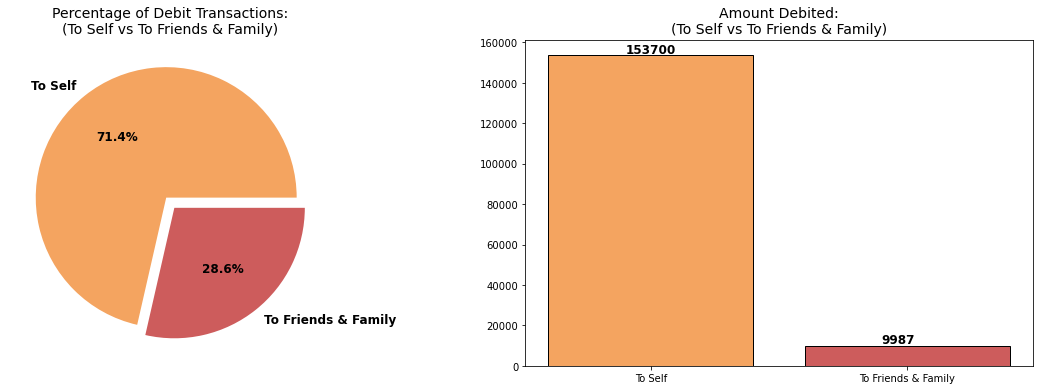

In [55]:
trnsc_count = np.array([40, 16])
trnsc_amnt = np.array([153700, 9987])
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.pie(trnsc_count, labels=['To Self', 'To Friends & Family'], explode=(0.05, 0.05), 
        colors=['sandybrown', 'indianred'], autopct='%.1f%%', radius=1, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Percentage of Debit Transactions:\n(To Self vs To Friends & Family)', fontsize=14)
plt.subplot(1, 2, 2)
plt.bar(x=['To Self', 'To Friends & Family'], height=trnsc_amnt, color=['sandybrown', 'indianred'], edgecolor='black', linewidth=1)
for i, data in enumerate(trnsc_amnt):
    plt.text(x=i-0.1, y=data+1000, s=f'{data}', color='black', fontsize=12, fontweight='bold')
plt.title('Amount Debited:\n(To Self vs To Friends & Family)', fontsize=14)
plt.show()

Observations:
- Around 71% of the debit transactions under 'Self, Friends & Family' category has been towards our own self
- When it comes to the amount of money transferred, we see that we have:
    - moved ~1,50,000 to our own self
    - moved ~10,000 to our friends and family

For investigating spending habits:  
- We will not consider those transactions where money has been credited to the A/C
- We will also ignore rows where money was debited but falls under the Category: 'Self, Friends & Family'

In [56]:
df_debit = df_clean.loc[(df_clean['Debit Amount'] > 0) & (df_clean['Transaction_Category'] != 'Self, Friends & Family')]
df_debit.head()

,Transaction_Date,Day,Month,Year,Transaction_Type,Transaction_Details,Transaction_Category,Debit Amount,Credit Amount,Closing Balance
7,08/09/20,8,9,2020,Automated Transaction,TAX SAVING INSURANCE,Insurance,104500.00,0.0,1000.00
10,12/09/20,12,9,2020,UPI,SWIGGY,Eating-Out,528.00,0.0,39472.00
12,15/09/20,15,9,2020,Automated Transaction,CHEQUE BOOK FEE,Miscellaneous,616.55,0.0,39383.45
13,16/09/20,16,9,2020,UPI,SWIGGY,Eating-Out,487.00,0.0,38896.45
16,19/09/20,19,9,2020,UPI,BAJAAO,Entertainment,28944.53,0.0,44951.92


## **Debit Amount: Investigating Median, IQR & Trends across Transaction Modes, Categories**

### **Transaction Modes**

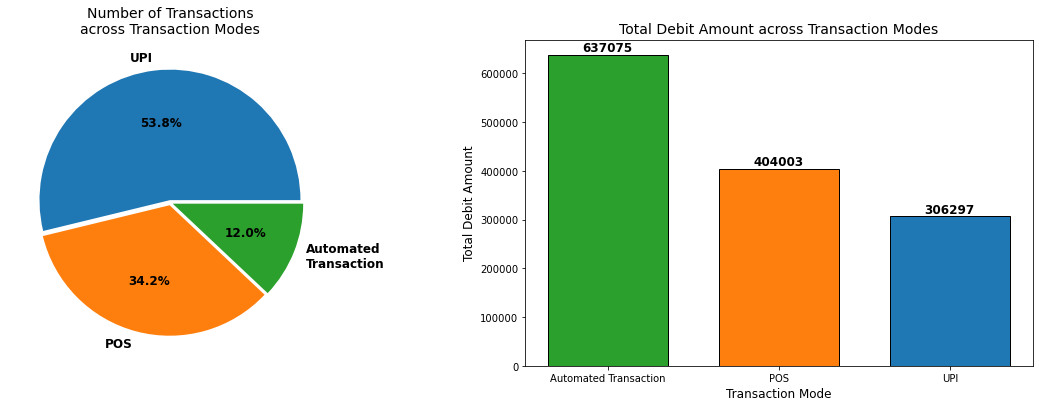

In [57]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.pie(df_debit['Transaction_Type'].value_counts().values, labels=['UPI', 'POS', 'Automated\nTransaction'], 
        explode=(0.02, 0.02, 0.02), autopct='%.1f%%', radius=1, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Number of Transactions\nacross Transaction Modes', fontsize=14)
plt.subplot(1, 2, 2)
plt.bar(x=df_debit.groupby('Transaction_Type')['Debit Amount'].agg(['sum']).index, 
        height=df_debit.groupby('Transaction_Type')['Debit Amount'].agg(['sum'])['sum'], 
        color=['tab:green', 'tab:orange', 'tab:blue'], edgecolor='black', linewidth=1, width=0.7)
for i, data in enumerate(df_debit.groupby('Transaction_Type')['Debit Amount'].agg(['sum'])['sum']):
    plt.text(x=i-0.15, y=data+7500, s=f'{int(data)}', color='black', fontsize=12, fontweight='bold')
plt.xlabel('Transaction Mode', fontsize=12)
plt.ylabel('Total Debit Amount', fontsize=12)
plt.title('Total Debit Amount across Transaction Modes', fontsize=14)
plt.show()

Observations:
- UPI is the most frequently used & Automated Transaction is the least frequently used mode for a transaction
- Amount of money debited from A/C is highest for Automated Transactions while is lowest for UPI

### **Transaction Category**

In [58]:
df_debit_category = df_debit.groupby('Transaction_Category')['Debit Amount'].agg(['sum', 'count']).sort_values(by='count', ascending=False)
total_count = df_debit_category['count'].sum()
total_sum = df_debit_category['sum'].sum()
df_debit_category['count'] = 100*(df_debit_category['count'] / total_count)
df_debit_category['sum'] = 100*(df_debit_category['sum'] / total_sum)
# df_debit_category

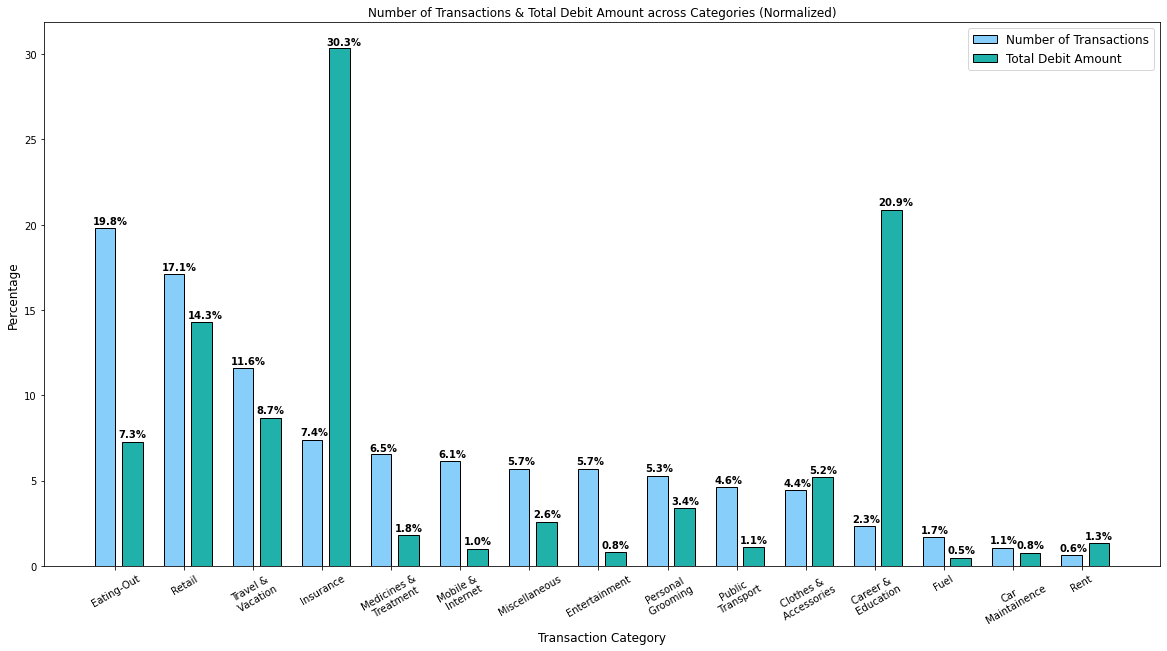

In [59]:
plt.figure(figsize=(20, 10))
index = np.arange(df_debit_category.index.size)
width = 0.3
plt.bar(x=index, height=df_debit_category['count'], width=width, label='Number of Transactions', color='lightskyblue', edgecolor='black')
plt.bar(x=index+width+0.1, height=df_debit_category['sum'], width=width, label='Total Debit Amount', color='lightseagreen', edgecolor='black')
for ind,data in enumerate(df_debit_category['count']):
    plt.text(x=ind-0.175, y=round(data, 1)+0.25, s=f'{round(data, 1)}%', color='black', fontsize=10, fontweight='bold', rotation=0)
for ind,data in enumerate(df_debit_category['sum']):
    plt.text(x=ind+0.2, y=round(data, 1)+0.25, s=f'{round(data, 1)}%', color='black', fontsize=10, fontweight='bold', rotation=0)
plt.xticks(ticks=index+(width/2), 
           labels=['Eating-Out', 'Retail', 'Travel &\n Vacation', 'Insurance', 'Medicines &\n Treatment', 'Mobile &\n Internet', 'Miscellaneous',
                   'Entertainment', 'Personal\n Grooming', 'Public\n Transport', 'Clothes &\n Accessories', 'Career &\n Education', 'Fuel', 
                   'Car\n Maintainence', 'Rent'], rotation=30)
plt.xlabel('Transaction Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(fontsize=12)
plt.title('Number of Transactions & Total Debit Amount across Categories (Normalized)')
plt.show()

Observations:
- Top 3 categories where we had highest number of transactions:
    1. Eating out
    2. Retail
    3. Travel & Vacation
- Top 3 categories where we had maximum spending:
    1. Insurance
    2. Career & Education
    3. Retail

### **Transactions across Mode & Category**

In [60]:
# df_debit.groupby(['Transaction_Category', 'Transaction_Type'])['Debit Amount'].agg(['count'])
# pd.pivot_table(data=df_debit, index='Transaction_Category', columns='Transaction_Type', values='Debit Amount', aggfunc='count')

<AxesSubplot:xlabel='Transaction_Type', ylabel='Transaction_Category'>

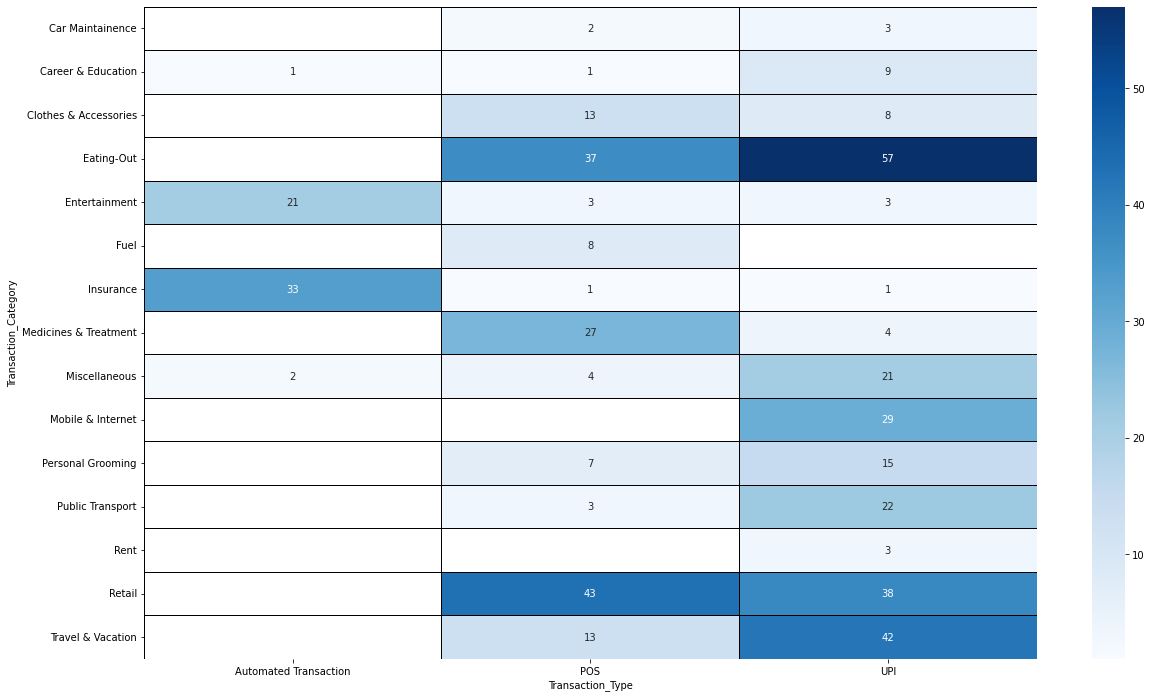

In [61]:
plt.figure(figsize=(20, 12))
sns.heatmap(pd.pivot_table(data=df_debit, index='Transaction_Category', columns='Transaction_Type', values='Debit Amount', aggfunc='count'), 
            annot=True, cmap='Blues', 
            linewidth=1, linecolor='black')

Observations:
We can clearly see that certain Transaction Modes are preferred for certain categories 
1. Eating-out: Mostly UPI and POS
2. Retail: Mostly POS and UPI
3. Travel & Vacation: Mostly UPI and POS
4. Insurance: Mostly Automated Transactions
5. Medicines & Treatment: Mostly POS

### **Handling Outliers**

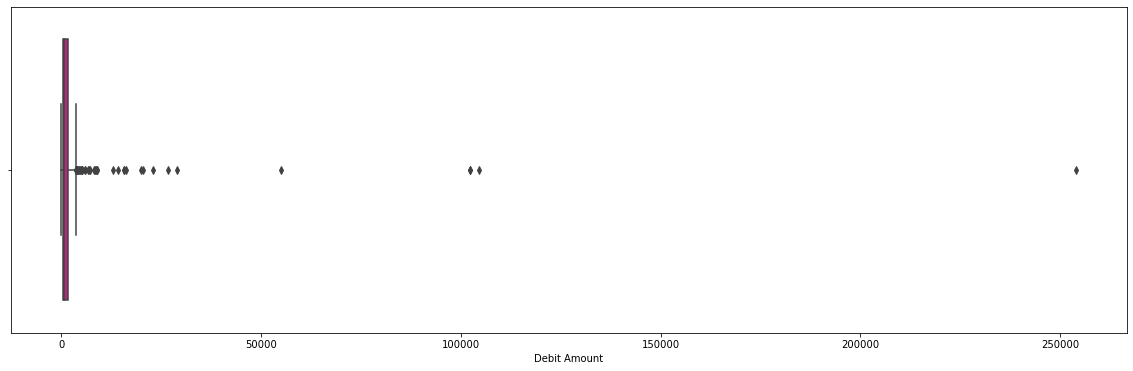

In [62]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=df_debit['Debit Amount'], color='mediumvioletred')
plt.show()

-  As we can see above, there are 4 prominent outliers above 50,000
-  Let us remove them and see again

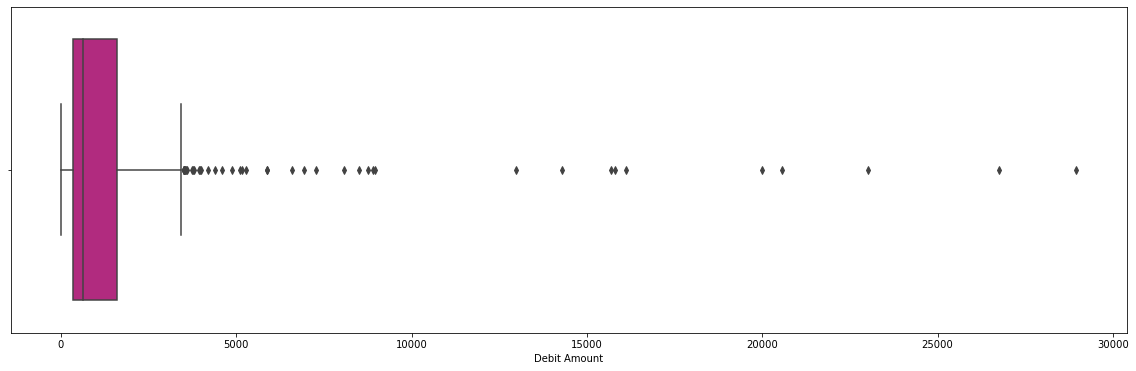

In [63]:
plt.figure(figsize=(20, 6))
sns.boxplot(x = df_debit.loc[df_debit['Debit Amount'] < 50000, 'Debit Amount'], color='mediumvioletred')
plt.show()

-  As we can see that even after considering transactions below 50,000, there are still some sparse ouliers above 10,000
-  These high value transactions are very few in nature and may be some kind of an annual EMI or a lumpsum payment for a bill. 
    -  Hence these are not a good representation of our regular spending habits and hence we will treat them seperately
-  For the sake of understanding the median and IQR od debit amount, we will divide the data into 2 parts
    -  Regular Transactions (< 10K)
    -  High value Transaction (>= 10K)

In [64]:
regular_transactions = df_debit.loc[df_debit['Debit Amount'] < 10000]
high_value_transactions = df_debit.loc[(df_debit['Debit Amount'] >= 10000) ]

In [65]:
print('Total Debit Transactions:', df_debit.shape[0])
print('Total Regular Transactions (< 10K):', regular_transactions.shape[0])
print('Total High value Transactions (>=10K):', high_value_transactions.shape[0])

Total Debit Transactions: 474
Total Regular Transactions (< 10K): 459
Total High value Transactions (>=10K): 15


- We have seperated out the outliers (transactions above >=10K)
- Now we can study the median and IQR of the our daily transactions
- We can also look at the median and IQR across Transaction Modes and Categories

### **Regular Transactions(< 10,000)**

#### **Histogram and Box-Plots**

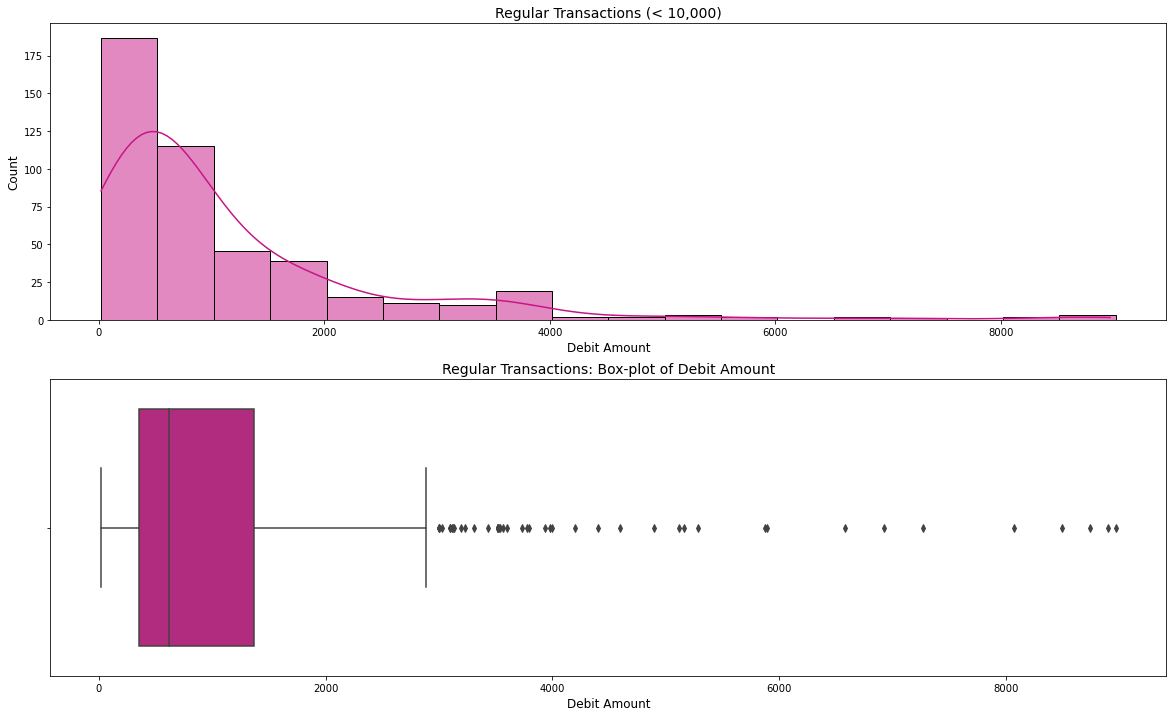

In [66]:
fig = plt.figure(figsize=(20, 12))
plt.subplot(2, 1, 1)
sns.histplot(x=regular_transactions['Debit Amount'], binwidth=500, kde=True, color='mediumvioletred')
plt.xlabel('Debit Amount', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Regular Transactions (< 10,000)', fontsize=14)
plt.subplot(2, 1, 2)
sns.boxplot(x = regular_transactions['Debit Amount'], color='mediumvioletred')
plt.xlabel('Debit Amount', fontsize=12)
plt.title('Regular Transactions: Box-plot of Debit Amount', fontsize=14)
plt.show()

In [67]:
# Median and IQR of debit amount
p_25 = np.percentile(regular_transactions['Debit Amount'], 25)
p_50 = np.percentile(regular_transactions['Debit Amount'], 50)
p_75 = np.percentile(regular_transactions['Debit Amount'], 75)
iqr = p_75 - p_25
print('Median:', p_50)
print('IQR:', iqr)

Median: 616.55
IQR: 1014.5


#### **Transaction Modes**

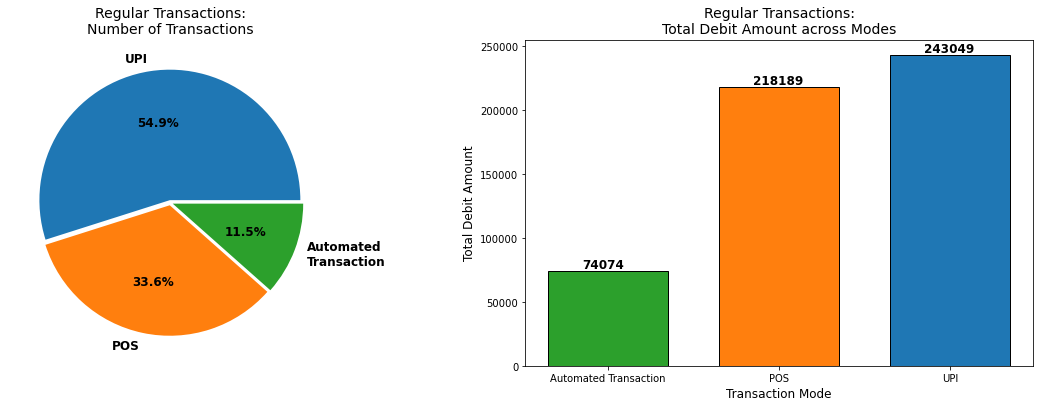

In [68]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.pie(regular_transactions['Transaction_Type'].value_counts().values, labels=['UPI', 'POS', 'Automated\nTransaction'], 
        explode=(0.02, 0.02, 0.02), autopct='%.1f%%', radius=1, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Regular Transactions:\nNumber of Transactions', fontsize=14)
plt.subplot(1, 2, 2)
plt.bar(x=regular_transactions.groupby('Transaction_Type')['Debit Amount'].agg(['sum']).index, 
        height=regular_transactions.groupby('Transaction_Type')['Debit Amount'].agg(['sum'])['sum'], 
        color=['tab:green', 'tab:orange', 'tab:blue'], edgecolor='black', linewidth=1, width=0.7)
for i, data in enumerate(regular_transactions.groupby('Transaction_Type')['Debit Amount'].agg(['sum'])['sum']):
    plt.text(x=i-0.15, y=data+2500, s=f'{int(data)}', color='black', fontsize=12, fontweight='bold')
plt.xlabel('Transaction Mode', fontsize=12)
plt.ylabel('Total Debit Amount', fontsize=12)
plt.title('Regular Transactions:\nTotal Debit Amount across Modes', fontsize=14)
plt.show()

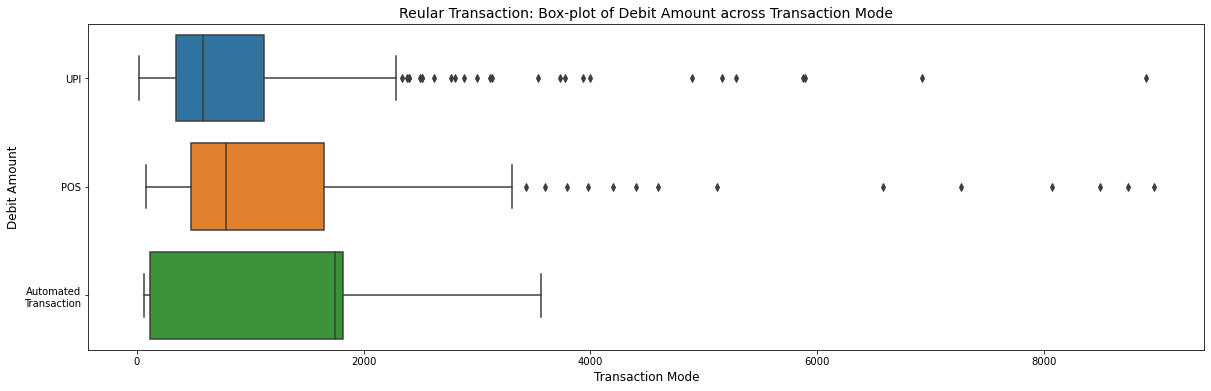

In [69]:
plt.figure(figsize=(20, 6))
sns.boxplot(y=regular_transactions['Transaction_Type'], 
            x=regular_transactions['Debit Amount'], order=df_debit['Transaction_Type'].value_counts().index)
plt.xlabel('Transaction Mode', fontsize=12)
plt.ylabel('Debit Amount', fontsize=12)
plt.yticks(ticks=range(3), labels=['UPI', 'POS', 'Automated\nTransaction'])
plt.title('Reular Transaction: Box-plot of Debit Amount across Transaction Mode', fontsize=14)
plt.show()

In [70]:
p_25_upi = np.percentile(regular_transactions.loc[regular_transactions['Transaction_Type'] == 'UPI', 'Debit Amount'], 25)
p_50_upi = np.percentile(regular_transactions.loc[regular_transactions['Transaction_Type'] == 'UPI', 'Debit Amount'], 50)
p_75_upi = np.percentile(regular_transactions.loc[regular_transactions['Transaction_Type'] == 'UPI', 'Debit Amount'], 75)

p_25_pos = np.percentile(regular_transactions.loc[regular_transactions['Transaction_Type'] == 'POS', 'Debit Amount'], 25)
p_50_pos = np.percentile(regular_transactions.loc[regular_transactions['Transaction_Type'] == 'POS', 'Debit Amount'], 50)
p_75_pos = np.percentile(regular_transactions.loc[regular_transactions['Transaction_Type'] == 'POS', 'Debit Amount'], 75)

p_25_auto = np.percentile(regular_transactions.loc[regular_transactions['Transaction_Type'] == 'Automated Transaction', 'Debit Amount'], 25)
p_50_auto = np.percentile(regular_transactions.loc[regular_transactions['Transaction_Type'] == 'Automated Transaction', 'Debit Amount'], 50)
p_75_auto = np.percentile(regular_transactions.loc[regular_transactions['Transaction_Type'] == 'Automated Transaction', 'Debit Amount'], 75)

print('Median of UPI:', p_50_upi)
print('Median of POS:', p_50_pos)
print('Median of Automated Transaction:', p_50_auto)

print('IQR of UPI:', (p_75_upi - p_25_upi))
print('IQR of POS:', (p_75_pos - p_25_pos))
print('IQR of Automated Transaction:', (p_75_auto - p_25_auto))

Median of UPI: 583.5
Median of POS: 782.0
Median of Automated Transaction: 1745.0
IQR of UPI: 776.75
IQR of POS: 1167.675
IQR of Automated Transaction: 1701.59


Observations:
- Overall UPI is used most frequently and Automated transaction the least frequently
- The total amount of money debited is highest for UPI (2.43 Lakhs) closely followed by POS (2.18 Lakhs)
- Also, UPI is the most preferred mode of payment for lower debit amounts (Median = 584)
- Automated Transactions has been used more often for paying higher debit amounts (Median = 1745)

#### **Transaction Category**

In [71]:
reg_trnsc_category = regular_transactions.groupby('Transaction_Category')['Debit Amount'].agg(['sum', 'count']).sort_values(by='count', ascending=False)
total_count = reg_trnsc_category['count'].sum()
total_sum = reg_trnsc_category['sum'].sum()
reg_trnsc_category['count'] = 100*(reg_trnsc_category['count'] / total_count)
reg_trnsc_category['sum'] = 100*(reg_trnsc_category['sum'] / total_sum)
# reg_trnsc_category

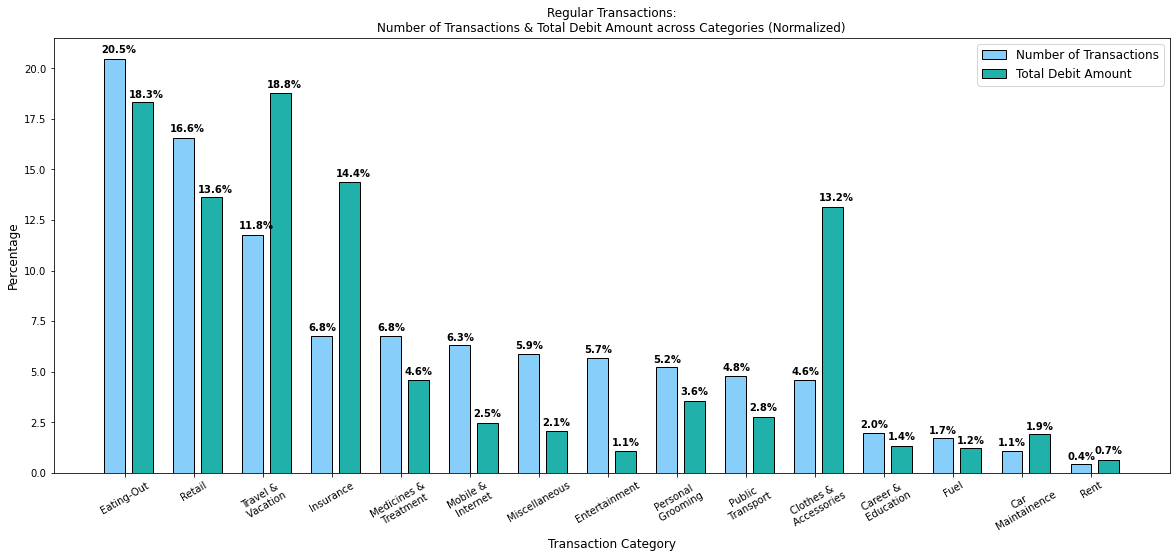

In [72]:
plt.figure(figsize=(20, 8))
index = np.arange(reg_trnsc_category.index.size)
width = 0.3
plt.bar(x=index, height=reg_trnsc_category['count'], width=width, label='Number of Transactions', color='lightskyblue', edgecolor='black')
plt.bar(x=index+width+0.1, height=reg_trnsc_category['sum'], width=width, label='Total Debit Amount', color='lightseagreen', edgecolor='black')
for ind,data in enumerate(reg_trnsc_category['count']):
    plt.text(x=ind-0.2, y=round(data, 1)+0.25, s=f'{round(data, 1)}%', color='black', fontsize=10, fontweight='bold', rotation=0)
for ind,data in enumerate(reg_trnsc_category['sum']):
    plt.text(x=ind+0.2, y=round(data, 1)+0.25, s=f'{round(data, 1)}%', color='black', fontsize=10, fontweight='bold', rotation=0)
plt.xticks(ticks=index+(width/2), 
           labels=['Eating-Out', 'Retail', 'Travel &\n Vacation', 'Insurance', 'Medicines &\n Treatment', 'Mobile &\n Internet', 'Miscellaneous',
                   'Entertainment', 'Personal\n Grooming', 'Public\n Transport', 'Clothes &\n Accessories', 'Career &\n Education', 'Fuel', 
                   'Car\n Maintainence', 'Rent'], rotation=30)
plt.xlabel('Transaction Category', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(fontsize=12)
plt.title('Regular Transactions:\nNumber of Transactions & Total Debit Amount across Categories (Normalized)')
plt.show()

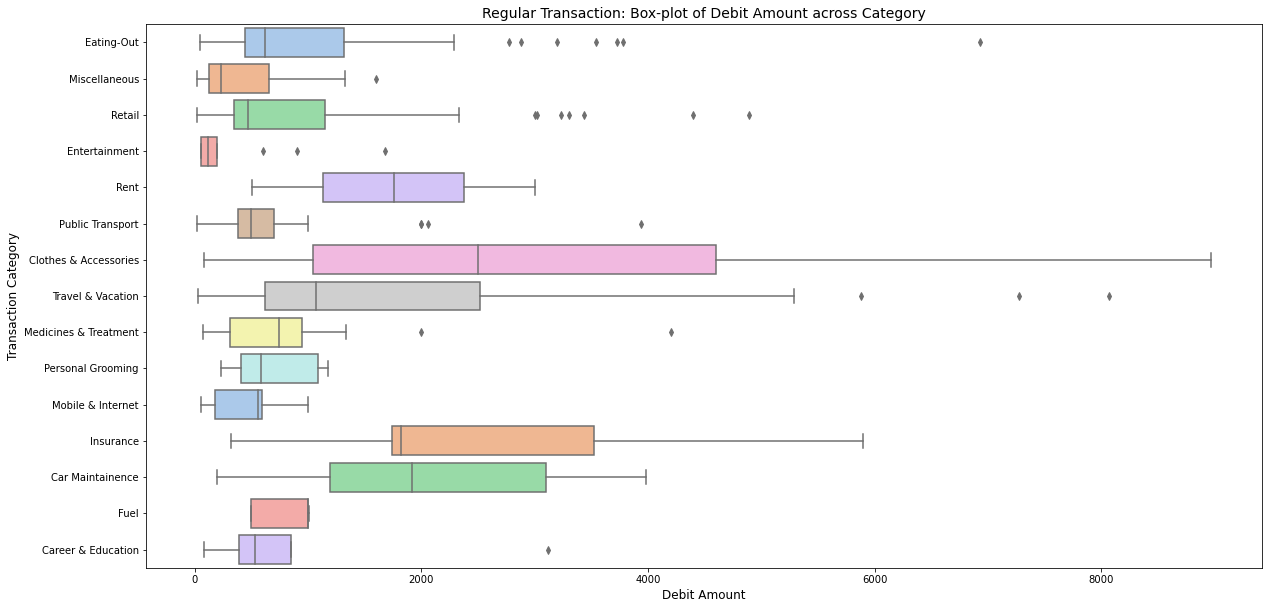

In [73]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = regular_transactions['Debit Amount'], y=regular_transactions['Transaction_Category'], palette='pastel')
plt.xlabel('Debit Amount', fontsize=12)
plt.ylabel('Transaction Category', fontsize=12)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
plt.title('Regular Transaction: Box-plot of Debit Amount across Category', fontsize=14)
plt.show()

In [74]:
print('Median Amount of Regular Transactions:')
for cat in regular_transactions['Transaction_Category'].unique():
    median = np.percentile(regular_transactions.loc[regular_transactions['Transaction_Category'] == cat, 'Debit Amount'], 50)
    print(f'{cat}: {median}')

Median Amount of Regular Transactions:
Eating-Out: 623.775
Miscellaneous: 236.0
Retail: 473.25
Entertainment: 119.0
Rent: 1755.0
Public Transport: 500.0
Clothes & Accessories: 2498.0
Travel & Vacation: 1066.8
Medicines & Treatment: 745.0
Personal Grooming: 588.0
Mobile & Internet: 563.0
Insurance: 1820.59
Car Maintainence: 1916.0
Fuel: 996.25
Career & Education: 529.0


Observations:
- Which categories have the highest number of transactions?
    1. Eating-Out
    2. Retail
    3. Travel & Vacation
- Which categories have the highest spending?  
    1. Travel & Vacation
    2. Eating-Out
    3. Insurance
- Which categories have the highest median for debit amounts?
    1. Clothes & Accessories (~2500)
    2. Car Maintainence (~1920)
    3. Insurance (~1820)

## **Temporal Trend**

### **Year-wise Spending**

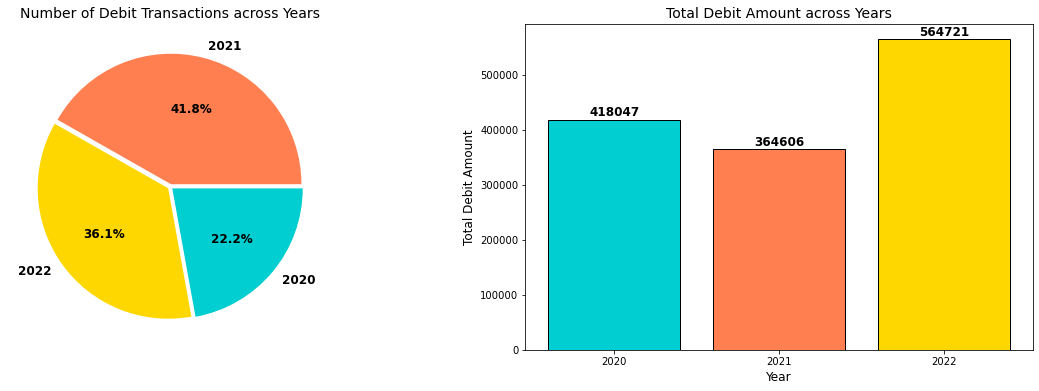

In [75]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.pie(df_debit['Year'].value_counts().values, labels=['2021', '2022', '2020'], 
        explode=(0.02, 0.02, 0.02), autopct='%.1f%%', radius=1, textprops={'fontsize': 12, 'fontweight': 'bold'}, 
        colors=['coral', 'gold', 'darkturquoise'])
plt.title('Number of Debit Transactions across Years', fontsize=14)
plt.subplot(1, 2, 2)
plt.bar(x=df_debit.groupby('Year')['Debit Amount'].agg(['sum']).reset_index()['Year'], 
        height=df_debit.groupby('Year')['Debit Amount'].agg(['sum']).reset_index()['sum'], 
        color=['darkturquoise', 'coral', 'gold'], edgecolor='black')
for ind,data in enumerate(df_debit.groupby('Year')['Debit Amount'].agg(['sum']).reset_index()['sum']):
    plt.text(x=ind+2020-0.15, y=data+7500, s=int(data), color='black', fontsize=12, fontweight='bold')
plt.xticks([2020, 2021, 2022])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Debit Amount', fontsize=12)
plt.title('Total Debit Amount across Years', fontsize=14)
plt.show()

Observations:
- Maximum spending in: 2022
- Minimum spending in: 2021

### **MoM Spending**

In [76]:
debit_by_yr_mon = df_debit.groupby(['Year', 'Month'])['Debit Amount'].agg(['count', 'sum']).reset_index()
debit_by_yr_mon['Year-Month'] = debit_by_yr_mon[['Year', 'Month']].apply(lambda x: str(x['Year'])+'-'+str(x['Month']), axis=1)
print('Mean number of transactions by month:', debit_by_yr_mon['count'].mean())
print('Mean debit amount by month:', debit_by_yr_mon['sum'].mean())

Mean number of transactions by month: 16.928571428571427
Mean debit amount by month: 48120.56607142858


In [77]:
# debit_by_yr_mon

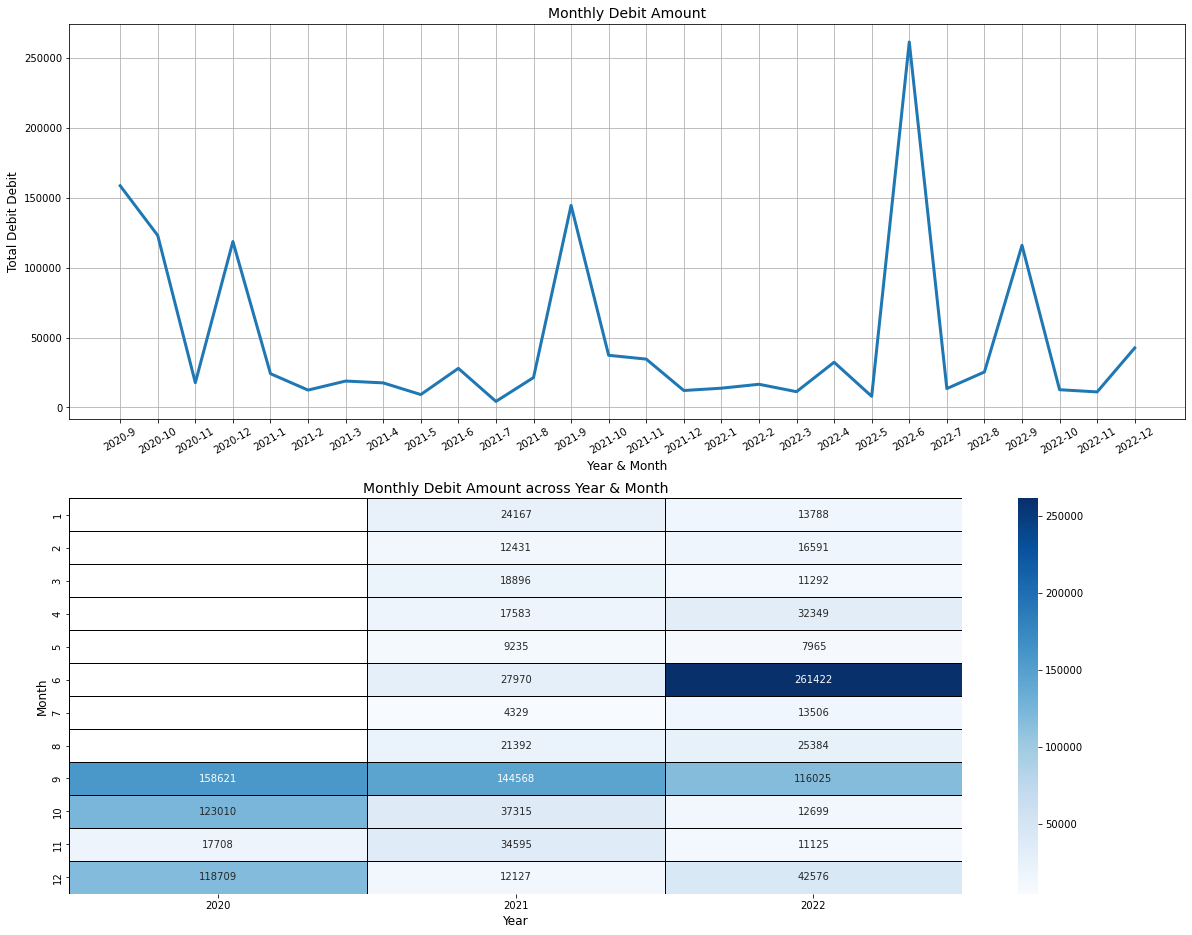

In [78]:
fig = plt.figure(figsize=(20, 16))
plt.subplot(2, 1, 1)
plt.plot(debit_by_yr_mon['Year-Month'], debit_by_yr_mon['sum'], linewidth=3)
plt.xticks(rotation=30)
plt.xlabel('Year & Month', fontsize=12)
plt.ylabel('Total Debit Debit', fontsize=12)
plt.title('Monthly Debit Amount', fontsize=14)
plt.grid(True)
plt.subplot(2, 1, 2)
sns.heatmap(pd.pivot_table(df_debit, index='Month', columns='Year', values='Debit Amount', aggfunc='sum'), 
            annot=True, fmt=".0f", cmap='Blues', linewidth=1, linecolor='black')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.title('Monthly Debit Amount across Year & Month', fontsize=14)
plt.show()

Observations:

- 2020 has only 4 months of data
    - This is expected since we opened the bank A/C on September, 2020
    - The other 2 years (2021 and 2022) has complete data for 12 months
- We can see that there are 6 distinct months were the monthly debit amounts were above 50k:
    1. Sep, 2020: 1,59,000
    2. Oct, 2020: 1,23,000
    3. Dec, 2020: 1,19,000
    4. Sep, 2021: 1,45,000
    5. Jun, 2022: 2,61,000
    6. Sep, 2022: 1,16,000
- Recalling what purchases were made in the above months:
    - September 2020, 2021, 2022 
        - We have an Annual EMI (~1 Lakh) debited each year in September towards a Tax Saving Insurance pan.
    - October 2020 & December 2020:
        - In October 2020, there were significant purchases made under:
            1. Clothes & Accessories
            2. Flight tickets
        - In December 2020 there were significant purchases made:
            1. Apple Ipad Air
            2. Apple Pencil
            3. 24-Inch Dell Monitor
            4. Wooden Work Desk and Chair  
    - June, 2022: 
        - There is a educational fee of ~2.5 Lakh towards Scaler (online institute)

### **Needs vs Wants**

In [79]:
df_debit.head()

,Transaction_Date,Day,Month,Year,Transaction_Type,Transaction_Details,Transaction_Category,Debit Amount,Credit Amount,Closing Balance
7,08/09/20,8,9,2020,Automated Transaction,TAX SAVING INSURANCE,Insurance,104500.00,0.0,1000.00
10,12/09/20,12,9,2020,UPI,SWIGGY,Eating-Out,528.00,0.0,39472.00
12,15/09/20,15,9,2020,Automated Transaction,CHEQUE BOOK FEE,Miscellaneous,616.55,0.0,39383.45
13,16/09/20,16,9,2020,UPI,SWIGGY,Eating-Out,487.00,0.0,38896.45
16,19/09/20,19,9,2020,UPI,BAJAAO,Entertainment,28944.53,0.0,44951.92


In [80]:
wants = ['Eating-Out', 'Entertainment', 'Retail', 'Clothes & Accessories', 'Travel & Vacation']
needs = ['Rent', 'Public Transport', 'Car Maintainence', 'Fuel', 'Medicines & Treatment', 'Personal Grooming', 'Mobile & Internet', 'Insurance', 'Career & Education']

In [81]:
df_debit_by_cat_yr_mon = df_debit.loc[df_debit['Transaction_Category'] != 'Miscellaneous'].groupby(['Transaction_Category', 'Year', 'Month'])['Debit Amount'].agg(['sum']).reset_index()
df_debit_by_cat_yr_mon['Debit_Type'] = df_debit_by_cat_yr_mon['Transaction_Category'].apply(lambda x: 'Needs' if x in needs else 'Wants')
# df_debit_by_cat_yr_mon

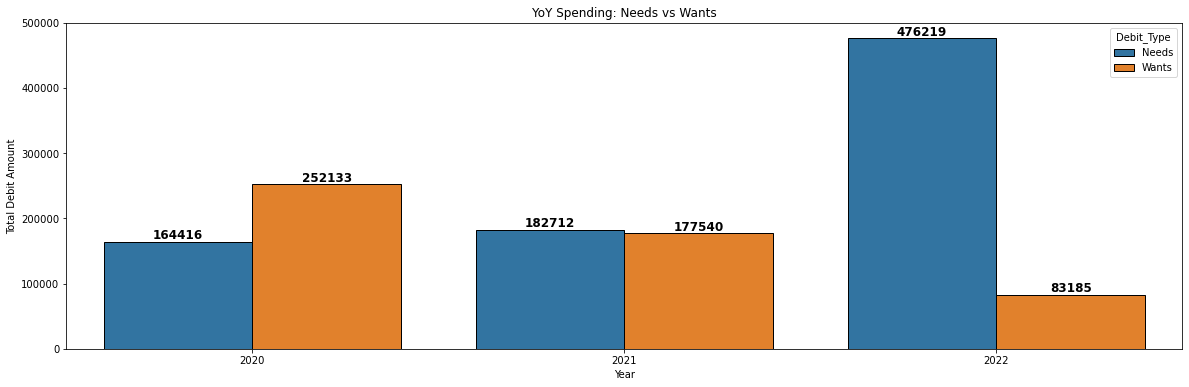

In [82]:
plt.figure(figsize=(20, 6))
f = sns.barplot(data=df_debit_by_cat_yr_mon, y='sum', x='Year', ci=None, estimator=np.sum, hue='Debit_Type', edgecolor='black')
for i in f.containers:
    f.bar_label(i, fontsize=12, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Debit Amount')
plt.title('YoY Spending: Needs vs Wants')
plt.show()

Observations:
- The total amount spent on Needs has increased YoY
- The total amount spent on Wants has decreased YoY

### **Needs**

In [83]:
df_debit_needs_by_cat_yr_mon = df_debit_by_cat_yr_mon.loc[df_debit_by_cat_yr_mon['Debit_Type'] == 'Needs']
# df_debit_needs_by_cat_yr_mon

In [84]:
# df_debit_needs_by_cat_yr_mon.groupby(['Transaction_Category'])['sum'].agg(['sum']).sort_values(by='sum')

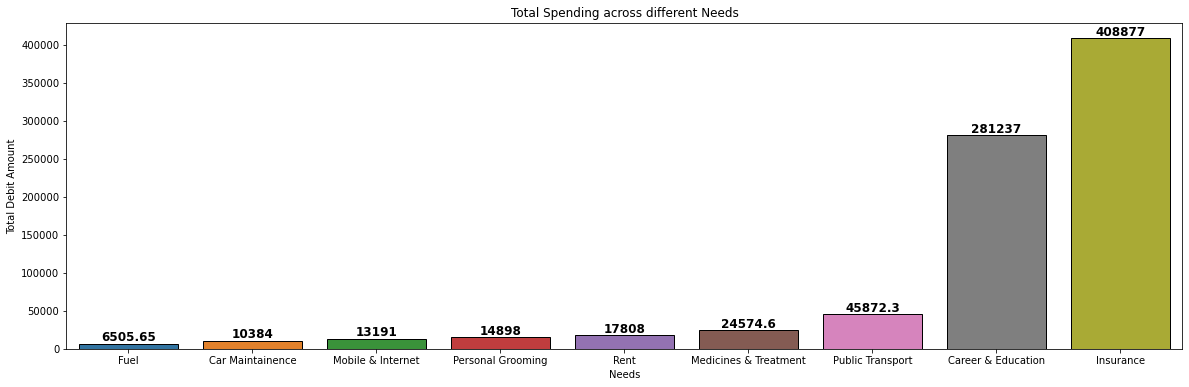

In [85]:
plt.figure(figsize=(20, 6))
f = sns.barplot(data=df_debit_needs_by_cat_yr_mon, y='sum', x='Transaction_Category', estimator=np.sum, ci=None, edgecolor='black', 
                order=df_debit_needs_by_cat_yr_mon.groupby(['Transaction_Category'])['sum'].agg(['sum']).sort_values(by='sum').index)
for i in f.containers:
    f.bar_label(i, fontsize=12, fontweight='bold')
plt.xlabel('Needs')
plt.ylabel('Total Debit Amount')
plt.title('Total Spending across different Needs')
plt.show()

Observations:

We can clearly see that total amount spent is significantly higher for 2 categories. We will thus segregate them and analyze further.
1. High value Needs
    - Insurance
    - Career & Education
2. Low value Needs
    - Public Transport
    - Medicines & Treatment
    - Rent
    - Personal Grooming
    - Mobile & Internet
    - Car Maintainence
    - Fuel

In [86]:
low_value_needs = df_debit_needs_by_cat_yr_mon.groupby(['Transaction_Category'])['sum'].agg(['sum']).sort_values(by='sum').index[:-2]

#### ***High value Needs***

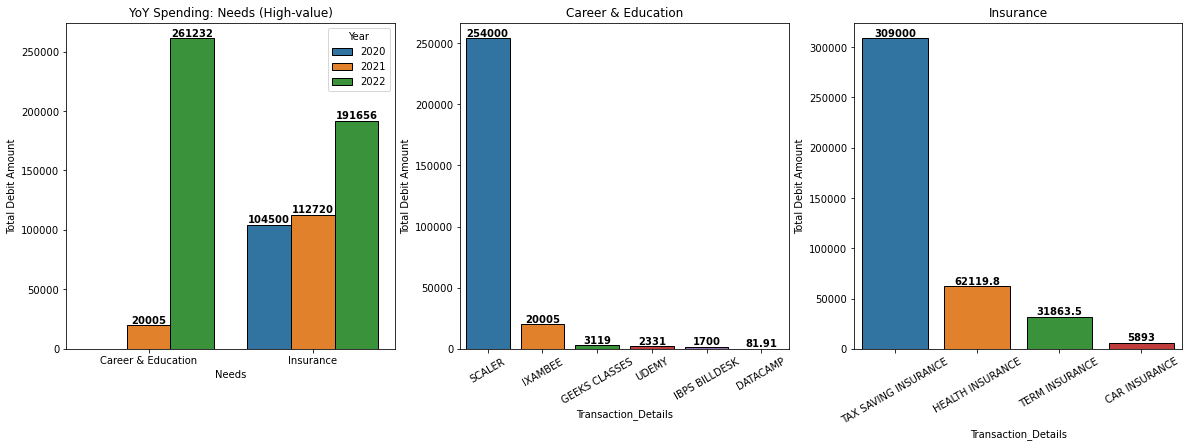

In [87]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
f = sns.barplot(data=df_debit_needs_by_cat_yr_mon.loc[~df_debit_needs_by_cat_yr_mon['Transaction_Category'].isin(low_value_needs)], 
                y='sum', x='Transaction_Category', estimator=np.sum, ci=None, hue='Year', edgecolor='black')
for i in f.containers:
    f.bar_label(i, fontsize=10, fontweight='bold', rotation=0)
plt.xlabel('Needs')
plt.ylabel('Total Debit Amount')
plt.title('YoY Spending: Needs (High-value)')
plt.subplot(1, 3, 2)
f = sns.barplot(data=df_debit.loc[df_debit['Transaction_Category'] == 'Career & Education'], x='Transaction_Details', y='Debit Amount', estimator=np.sum, ci=None, edgecolor='black', 
                order = df_debit.loc[df_debit['Transaction_Category'] == 'Career & Education'].groupby(['Transaction_Details'])['Debit Amount'].agg(['sum']).sort_values(by='sum').index[::-1])
for i in f.containers:
    f.bar_label(i, fontsize=10, fontweight='bold', rotation=0)
plt.xticks(rotation=30)
plt.ylabel('Total Debit Amount')
plt.title('Career & Education')
plt.subplot(1, 3, 3)
f = sns.barplot(data=df_debit.loc[df_debit['Transaction_Category'] == 'Insurance'], x='Transaction_Details', y='Debit Amount', estimator=np.sum, ci=None, edgecolor='black', 
                order = df_debit.loc[df_debit['Transaction_Category'] == 'Insurance'].groupby(['Transaction_Details'])['Debit Amount'].agg(['sum']).sort_values(by='sum').index[::-1])
for i in f.containers:
    f.bar_label(i, fontsize=10, fontweight='bold', rotation=0)
plt.xticks(rotation=30)
plt.ylabel('Total Debit Amount')
plt.title('Insurance')

plt.show()

Observations:

- The YoY spending for both Inurance and Career & Education has increased:
- Career & Education: 
    - 2022: We had the pay the course fees for online educational institute Scaler
- Insurance: We have started the following insurance products as follows:
    - 2020 onwards: Tax Saving Insurance
    - 2021 onwards: Term Insurance
    - 2022 onwards: Health Insurance for Parents & Car Insurance

#### ***Low value Needs***

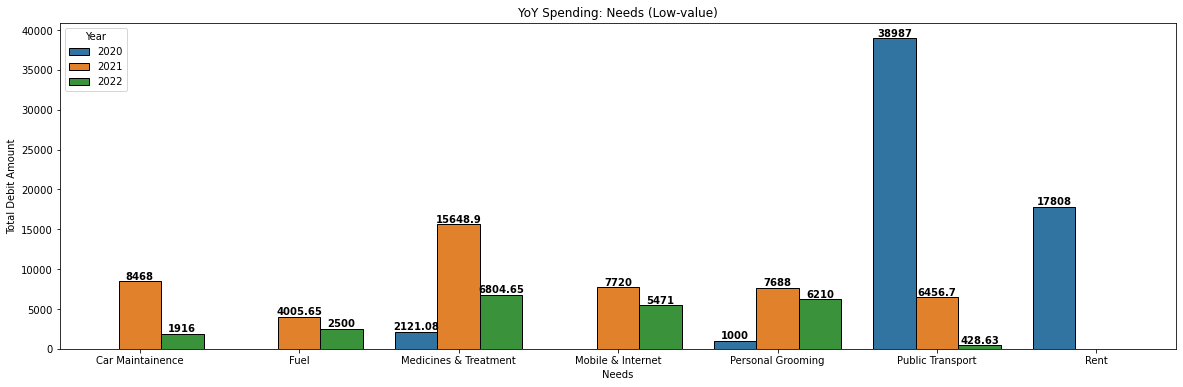

In [88]:
plt.figure(figsize=(20, 6))
f = sns.barplot(data=df_debit_needs_by_cat_yr_mon.loc[df_debit_needs_by_cat_yr_mon['Transaction_Category'].isin(low_value_needs)], 
                y='sum', x='Transaction_Category', estimator=np.sum, ci=None, hue='Year', edgecolor='black',)
for i in f.containers:
    f.bar_label(i, fontsize=10, fontweight='bold', rotation=0)
plt.xlabel('Needs')
plt.ylabel('Total Debit Amount')
plt.title('YoY Spending: Needs (Low-value)')
plt.show()

Observations:
- All of the categories show a decline
- Public Transport is predominantly high in 2020 and negligible in 2022
    - In 2020, we had travelled by flight, hence the high expense
    - In 2022, we travelled less in general
    - Also whatever travel happended from late 2021 onwards was by personal vehicle 
- Rent is only present in 2020 since we started to stay in own home since 2021

#### ***What forms of public transport were taken?***

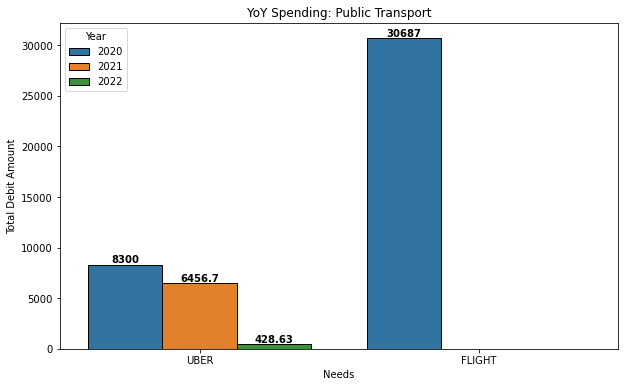

In [89]:
plt.figure(figsize=(10, 6))
f = sns.barplot(data=df_debit.loc[df_debit['Transaction_Category'] == 'Public Transport'], x='Transaction_Details', y='Debit Amount', 
                estimator=np.sum, ci=None, hue='Year', edgecolor='black')
for i in f.containers:
    f.bar_label(i, fontsize=10, fontweight='bold', rotation=0)
plt.xlabel('Needs')
plt.ylabel('Total Debit Amount')
plt.title('YoY Spending: Public Transport')
plt.show()

Obsevations:
- The YoY money spent on Uber has decreased.
- This makes sense since we bought a personal car in late 2021 and hence the need was Uber was not that much.

#### ***How frequently do we go for personal grooming (haircut)?***

In [90]:
df_debit_groom = df_debit.loc[df_debit['Transaction_Category'] == 'Personal Grooming'].copy()
df_debit_groom.drop(168, inplace=True)
df_debit_groom['Date'] = pd.to_datetime(df_debit_groom['Transaction_Date'], dayfirst=True)
df_debit_groom['Lag_Date'] = df_debit_groom['Date'].shift(1)
df_debit_groom['Gap_Days'] = (df_debit_groom['Date'] - df_debit_groom['Lag_Date']).apply(lambda x: str(x).split()[0])
df_debit_groom.drop(110, inplace=True)
df_debit_groom['Gap_Days'] = df_debit_groom['Gap_Days'].apply(lambda x: int(x))
# df_debit_groom.head()

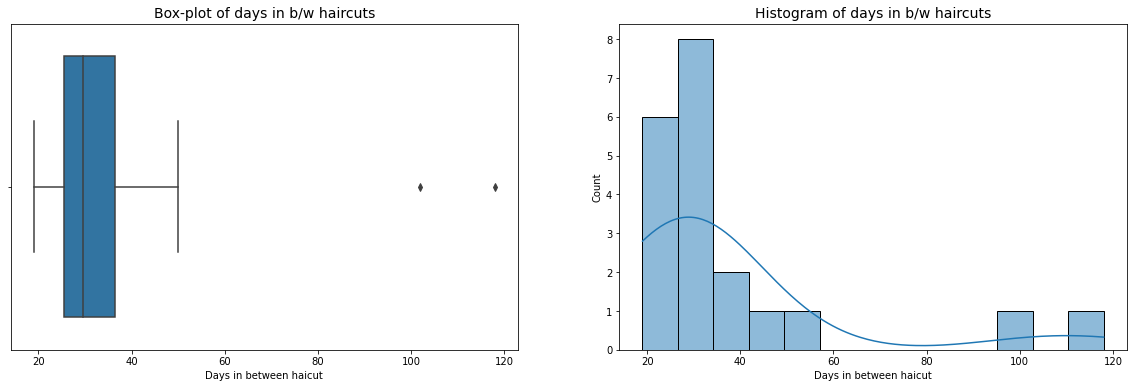

In [91]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_debit_groom['Gap_Days'])
plt.xlabel('Days in between haicut')
plt.title('Box-plot of days in b/w haircuts', fontsize=14)
plt.subplot(1, 2, 2)
sns.histplot(df_debit_groom['Gap_Days'], kde=True)
plt.xlabel('Days in between haicut')
plt.title('Histogram of days in b/w haircuts', fontsize=14)
plt.show()

In [92]:
p_50_groom = np.percentile(df_debit_groom['Gap_Days'].values, 50)
print('Median of days in b/w haircuts:', p_50_groom)

Median of days in b/w haircuts: 29.5


Observations:
- We tend to wait for about a month b/w successive haircuts

### **Wants**

In [93]:
df_debit_wants_by_cat_yr_mon = df_debit_by_cat_yr_mon.loc[df_debit_by_cat_yr_mon['Debit_Type'] == 'Wants']
# df_debit_wants_by_cat_yr_mon

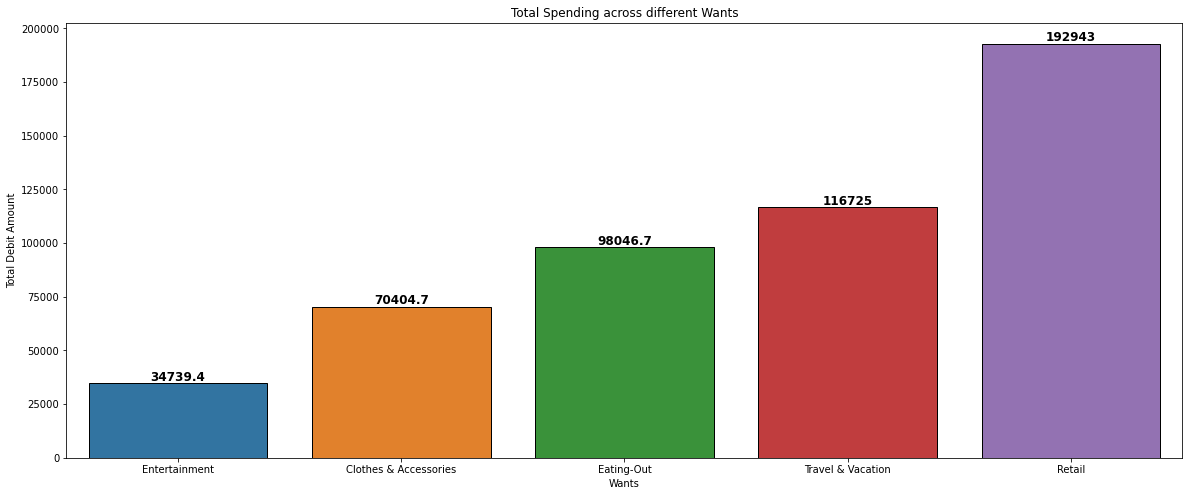

In [94]:
plt.figure(figsize=(20, 8))
f = sns.barplot(data=df_debit_wants_by_cat_yr_mon, y='sum', x='Transaction_Category', estimator=np.sum, ci=None, edgecolor='black', 
                order=df_debit_wants_by_cat_yr_mon.groupby(['Transaction_Category'])['sum'].agg(['sum']).sort_values(by='sum').index)
for i in f.containers:
    f.bar_label(i, fontsize=12, fontweight='bold')
plt.xlabel('Wants')
plt.ylabel('Total Debit Amount')
plt.title('Total Spending across different Wants')
plt.show()

Observations:

- Category with highest spending: Retail
- Category with lowest spending: Entertainment

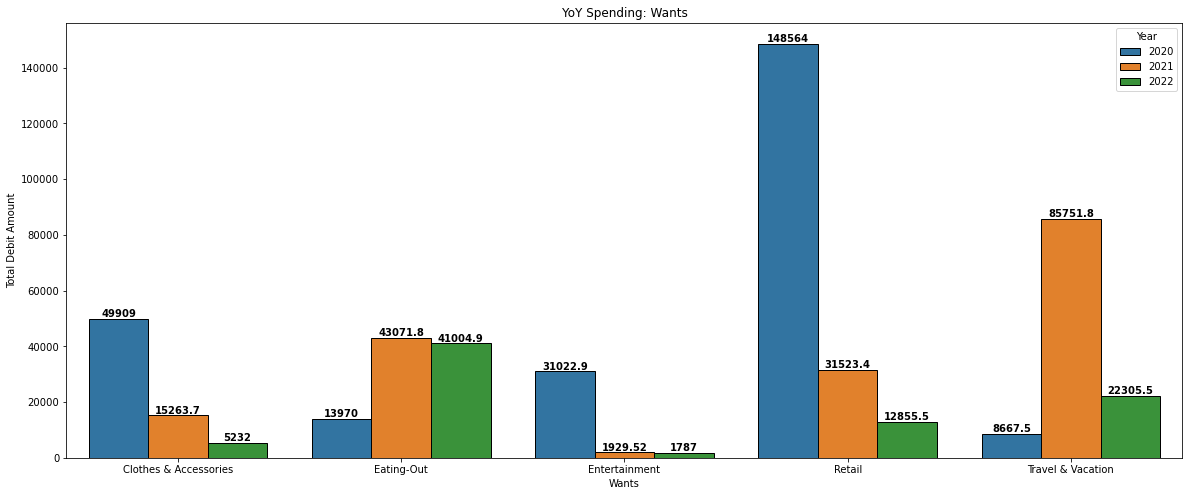

In [95]:
plt.figure(figsize=(20, 8))
f = sns.barplot(data=df_debit_wants_by_cat_yr_mon, 
                y='sum', x='Transaction_Category', estimator=np.sum, ci=None, hue='Year', edgecolor='black')
for i in f.containers:
    f.bar_label(i, fontsize=10, fontweight='bold', rotation=0)
plt.xlabel('Wants')
plt.ylabel('Total Debit Amount')
plt.title('YoY Spending: Wants')
plt.show()

Observations:

- Categories where a steady decline is observed:
    - Clothes & Accesories
    - Retail
    - Entertainment
- Eating Out:
    - Amount spent in 2021 and 2022 is almost the same
- Travel & Vacation:
    - 2021 is the year where we had the highest spending. This is expected since we made 3 trips in 2021

#### ***Do we tend to spend more across specific months?***

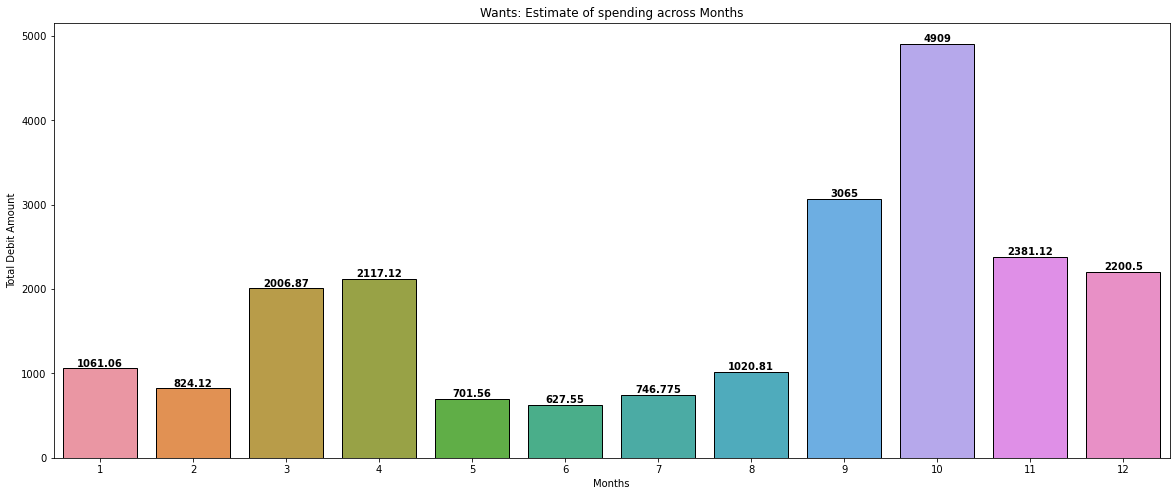

In [96]:
plt.figure(figsize=(20, 8))
f = sns.barplot(data=df_debit_wants_by_cat_yr_mon, 
                y='sum', x='Month', estimator=np.median, ci=None, edgecolor='black')
for i in f.containers:
    f.bar_label(i, fontsize=10, fontweight='bold', rotation=0)
plt.xlabel('Months')
plt.ylabel('Total Debit Amount')
plt.title('Wants: Estimate of spending across Months')
plt.show()

Observation:
- We have plotted the median spending on Wants across months
- From the above plot, it is clear that we tend to spend a higher amount on Wants in the months of September and October
- This is probably because the Indian festive season is primarily in these 2 months

#### ***Where did we spend the most in retail category?***

In [97]:
# df_debit.loc[df_debit['Transaction_Category'] == 'Retail'].groupby('Transaction_Details')['Debit Amount'].agg('sum').sort_values(ascending=False)

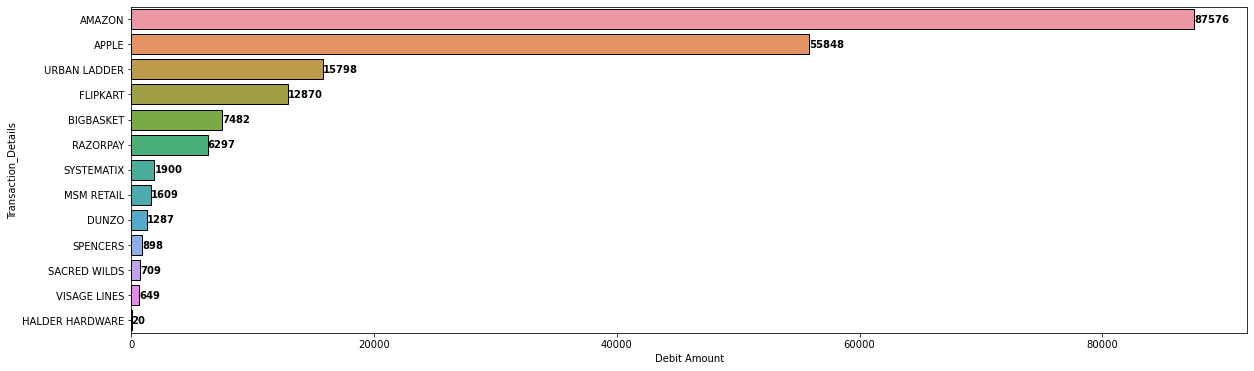

In [98]:
plt.figure(figsize=(20, 6))
f = sns.barplot(y=df_debit.loc[df_debit['Transaction_Category'] == 'Retail', 'Transaction_Details'], 
                x=df_debit.loc[df_debit['Transaction_Category'] == 'Retail', 'Debit Amount'], ci=None, estimator=np.sum, edgecolor='black', 
                order=df_debit.loc[df_debit['Transaction_Category'] == 'Retail'].groupby('Transaction_Details')['Debit Amount'].agg('sum').sort_values(ascending=False).index)
for item in f.containers:
    f.bar_label(item, fmt='%.0f', fontsize=10, fontweight='bold')

Observations:

For retail items, we have spent the highest in the following:
- Amazon
- Apple (Ipad Air)
- Urban Ladder (Work From Home setup)
- Flipkart

#### ***Spending across Amazon and Flipkart***
- We have spent a total of ~1,00,000 on Amazon and Flipkart
- Let us see the year wise trend of spending on these 2 platforms

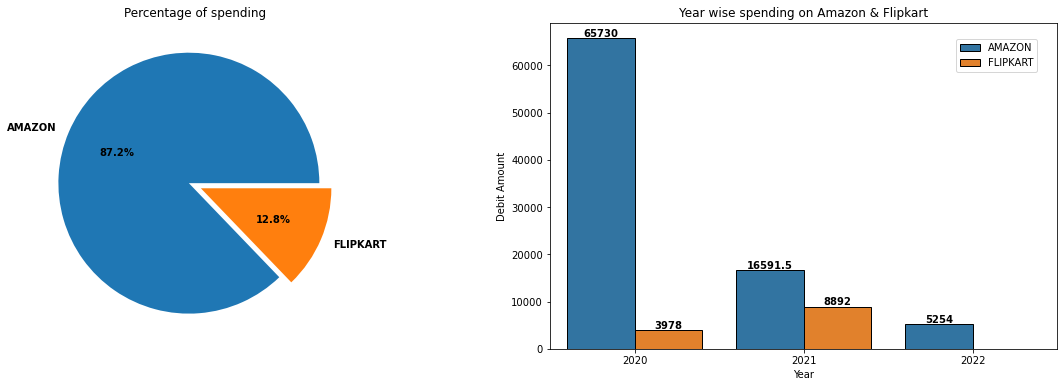

In [99]:
amzn_flipkart = df_debit.loc[(df_debit['Transaction_Details'] == 'AMAZON') | (df_debit['Transaction_Details'] == 'FLIPKART')]
fig=plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.pie(amzn_flipkart.groupby('Transaction_Details')['Debit Amount'].agg('sum').values, 
        labels=amzn_flipkart.groupby('Transaction_Details')['Debit Amount'].agg('sum').index, 
        explode=(0.05, 0.05), autopct='%.1f%%', textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Percentage of spending')
plt.subplot(1, 2, 2)
f = sns.barplot(x=amzn_flipkart['Year'], y=amzn_flipkart['Debit Amount'], ci=None, estimator=np.sum, edgecolor='black', hue=amzn_flipkart['Transaction_Details'])
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.title('Year wise spending on Amazon & Flipkart')
plt.legend(loc=(0.8, 0.85))
plt.show()

Observations:
- Amazon is the more preferred plaform
- We haven't made any purchase on Flipkart in 2022

#### ***How much did we spend across our different trips?***

In [100]:
df_travel = df_debit.loc[(df_debit['Transaction_Category'] == 'Travel & Vacation') & ((df_debit['Year']!=2022) | (df_debit['Month']!=12))]
df_travel.loc[df_travel['Transaction_Details'] == 'DARJEELING HOTEL BOOKING', 'Debit Amount'] = 4032
# df_travel

In [101]:
def classify_travel(df):
    digha = ['MAKEMYTRIP', 'HOTEL PARK POINT', 'PERFECT SODA', 'HOTEL BLUE WAVES']
    shantiniketan = ['MAKEMYTRIP', 'IRCTC', 'AMIT MONDAL']
    darjeeling = ['IRCTC', 'DARJEELING HOTEL BOOKING', 'GOLDEN TIPS TEA', 'ARA BY BELLEVUE', 'MS SELECTIONS', 'ASHWIN KUMAI', 'PULGER HOTELS']
    tajpur = ['SUVENDU MANDAL', 'IBIBOGROUP', 'BISHU MAITY', 'PRAKASH NAYAK']
    
    if (df['Year'] != 2022) & ((df['Month'] == 1) | (df['Month'] == 12)) & (df['Transaction_Details'] in (digha)):
        df['Vacation_Details'] = 'Digha'
    elif (df['Year'] == 2021) & ((df['Month'] == 3) | (df['Month'] == 4)) & (df['Transaction_Details'] in (shantiniketan)):
        df['Vacation_Details'] = 'Shantiniketan'
    elif (df['Year'] == 2021) & ((df['Month'] == 9) | (df['Month'] == 11)) & (df['Transaction_Details'] in (darjeeling)):
        df['Vacation_Details'] = 'Darjeeling'
    elif (df['Year'] != 2020) & ((df['Month'] == 1) | (df['Month'] == 12)) & (df['Transaction_Details'] in (tajpur)):
        df['Vacation_Details'] = 'Tajpur'
    else:
        df['Vacation_Details'] = 'Stays in Kolkata'
    
    return df

df_travel_details = df_travel.apply(classify_travel, axis=1)
df_travel_details.head()

,Transaction_Date,Day,Month,Year,Transaction_Type,Transaction_Details,Transaction_Category,Debit Amount,Credit Amount,Closing Balance,Vacation_Details
96,12/11/20,12,11,2020,POS,MSW BHAWANA,Travel & Vacation,3124.0,0.0,25429.37,Stays in Kolkata
100,13/11/20,13,11,2020,UPI,PANKAJ KUMAR,Travel & Vacation,966.0,0.0,32665.37,Stays in Kolkata
114,05/12/20,5,12,2020,UPI,AJAY KUMAR SAHA,Travel & Vacation,3135.0,0.0,32205.87,Stays in Kolkata
117,06/12/20,6,12,2020,UPI,SAHEB E ALAM,Travel & Vacation,546.0,0.0,30856.87,Stays in Kolkata
119,07/12/20,7,12,2020,UPI,AJAY KUMAR SAHA,Travel & Vacation,250.0,0.0,29871.87,Stays in Kolkata


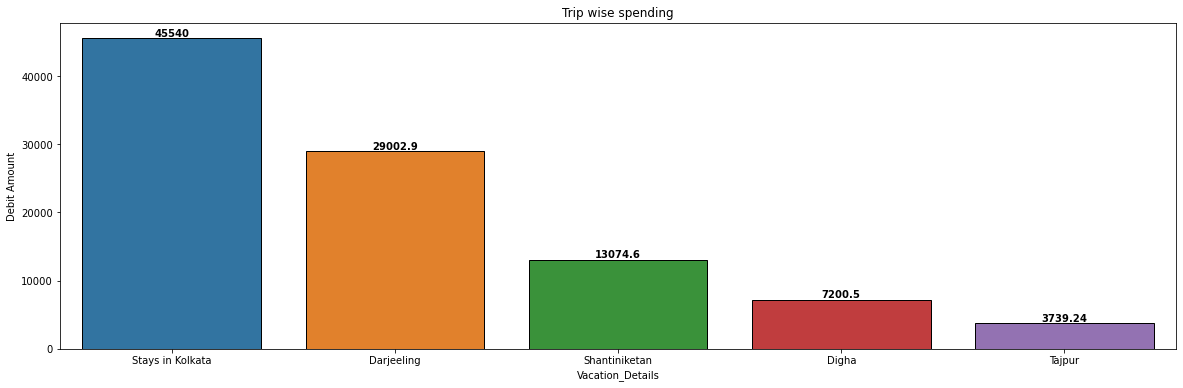

In [102]:
plt.figure(figsize=(20, 6))
f = sns.barplot(x=df_travel_details['Vacation_Details'], y=df_travel_details['Debit Amount'], estimator=np.sum, ci=None, edgecolor='black', 
                order=df_travel_details.groupby('Vacation_Details')['Debit Amount'].agg('sum').sort_values(ascending=False).index)
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.title('Trip wise spending')
plt.show()

Observations:
- We observe that we have spent the most on our Stays in Kolkata compared to our other trips

#### ***Year wise spending on Stays in Kolkata***
- We have almost spent 45,000 on ours stays in Kolkata

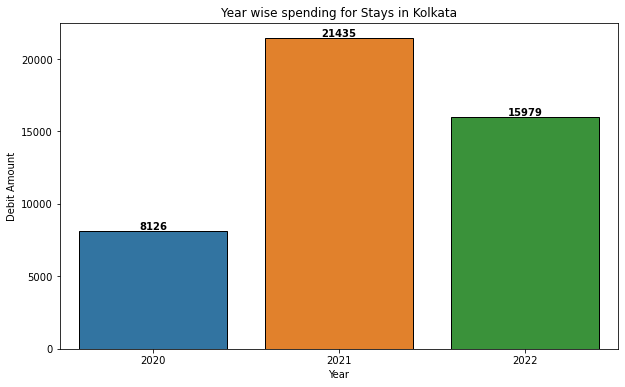

In [103]:
plt.figure(figsize=(10, 6))
f = sns.barplot(x=df_travel_details.loc[df_travel_details['Vacation_Details'] == 'Stays in Kolkata', 'Year'], 
            y=df_travel_details.loc[df_travel_details['Vacation_Details'] == 'Stays in Kolkata', 'Debit Amount'], ci=None, estimator=np.sum, edgecolor='black')
for item in f.containers:
    f.bar_label(item, fontsize=10, fontweight='bold')
plt.title('Year wise spending for Stays in Kolkata')
plt.show()

#### ***How frequently do we go for eating outside?***

In [104]:
df_debit_eatout = df_debit.loc[df_debit['Transaction_Category'] == 'Eating-Out'].copy()
df_debit_eatout['Date'] = pd.to_datetime(df_debit_eatout['Transaction_Date'], dayfirst=True)
df_debit_eatout['Lag_Date'] = df_debit_eatout['Date'].shift(1)
df_debit_eatout['Gap_Days'] = (df_debit_eatout['Date'] - df_debit_eatout['Lag_Date']).apply(lambda x: str(x).split()[0])
df_debit_eatout.drop(10, inplace=True)
df_debit_eatout['Gap_Days'] = df_debit_eatout['Gap_Days'].apply(lambda x: int(x))
# df_debit_eatout.head()

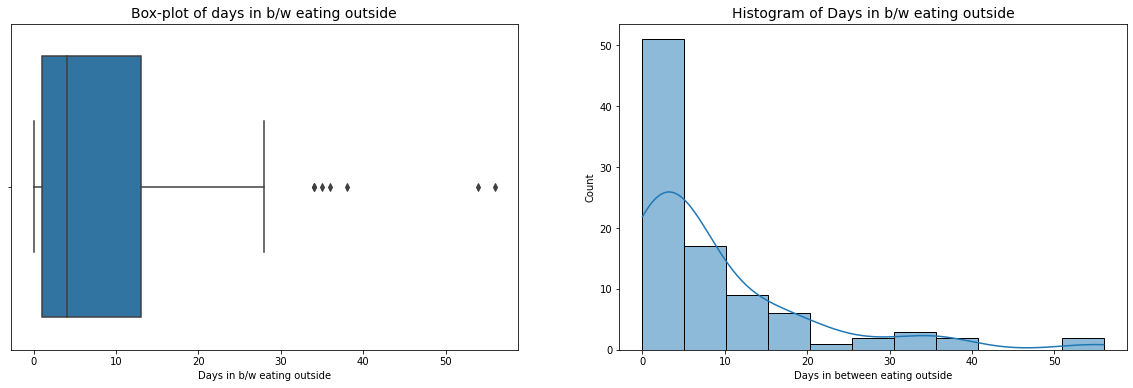

In [105]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_debit_eatout['Gap_Days'])
plt.xlabel('Days in b/w eating outside')
plt.title('Box-plot of days in b/w eating outside', fontsize=14)
plt.subplot(1, 2, 2)
sns.histplot(df_debit_eatout['Gap_Days'], kde=True)
plt.xlabel('Days in between eating outside')
plt.title('Histogram of Days in b/w eating outside', fontsize=14)
plt.show()

In [106]:
p_50_eatout = np.percentile(df_debit_eatout['Gap_Days'].values, 50)
print('Median of days in b/w eating outside:', p_50_eatout)

Median of days in b/w eating outside: 4.0


#### ***What was median eatout spent amount & maximum amount we spent in 1 day on eating outside?***

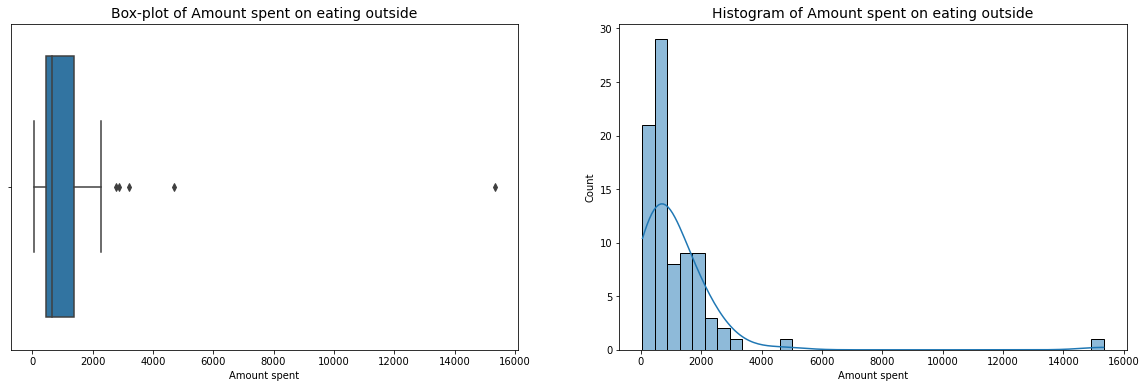

In [107]:
fig = plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_debit.loc[df_debit['Transaction_Category'] == 'Eating-Out'].groupby('Transaction_Date')['Debit Amount'].agg(['sum'])['sum'])
plt.xlabel('Amount spent')
plt.title('Box-plot of Amount spent on eating outside', fontsize=14)
plt.subplot(1, 2, 2)
sns.histplot(df_debit.loc[df_debit['Transaction_Category'] == 'Eating-Out'].groupby('Transaction_Date')['Debit Amount'].agg(['sum'])['sum'], kde=True)
plt.xlabel('Amount spent')
plt.title('Histogram of Amount spent on eating outside', fontsize=14)
plt.show()

In [108]:
p_50_amount_eatout = np.percentile(df_debit.loc[df_debit['Transaction_Category'] == 'Eating-Out'].groupby('Transaction_Date')['Debit Amount'].agg(['sum']), 50)
max_amount = df_debit.loc[df_debit['Transaction_Category'] == 'Eating-Out'].groupby('Transaction_Date')['Debit Amount'].agg(['sum'])['sum'].max()
print('Median of amount spent on eating outside:', p_50_amount_eatout)
print('Maximum amount spent in 1 day on eating outside:', max_amount)

Median of amount spent on eating outside: 666.475
Maximum amount spent in 1 day on eating outside: 15337.0


Observations:
- Generally, we tend to spend 4 days b/w 2 successive eat-outs
- The maximum amount we spent in a single day on eating outside is : 15K (This is also clearly showing up in the boxplot as the distant outlier)

### **Average Monthly expenditure across different categories (over a span of 2.5 years)**

In [109]:
df_debit_by_cat_yr_mon_pvt = pd.pivot(df_debit_by_cat_yr_mon[['Transaction_Category', 'Year', 'Month', 'sum']], 
                                      index=['Year', 'Month'], columns=['Transaction_Category'], values='sum')
df_debit_by_cat_yr_mon_pvt.fillna(0).apply(np.mean).sort_values(ascending=False)

Transaction_Category
Insurance                14602.733214
Career & Education       10044.175357
Retail                    6890.807857
Travel & Vacation         4168.742143
Eating-Out                3501.668929
Clothes & Accessories     2514.453571
Public Transport          1638.297500
Entertainment             1240.692500
Medicines & Treatment      877.665714
Rent                       636.000000
Personal Grooming          532.071429
Mobile & Internet          471.107143
Car Maintainence           370.857143
Fuel                       232.344643
dtype: float64

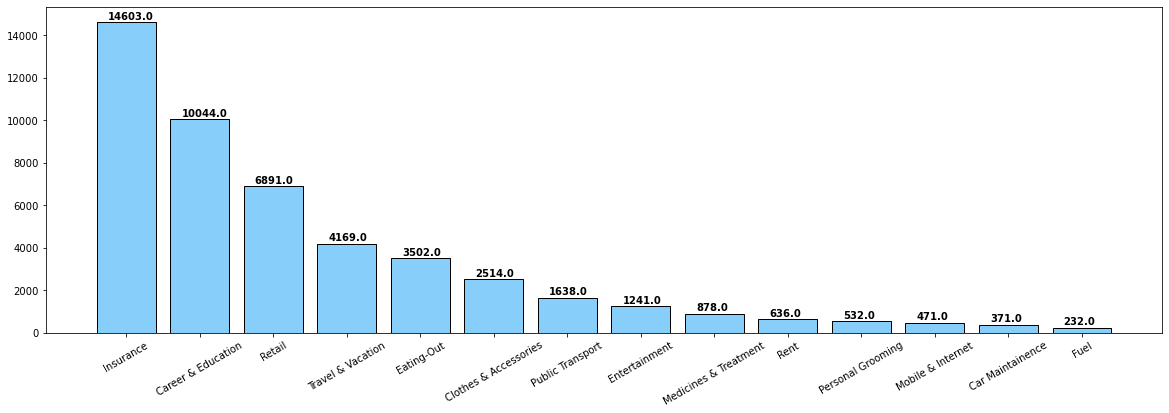

In [110]:
plt.figure(figsize=(20, 6))
plt.bar(x=df_debit_by_cat_yr_mon_pvt.fillna(0).apply(np.mean).sort_values(ascending=False).index, 
        height=df_debit_by_cat_yr_mon_pvt.fillna(0).apply(np.mean).sort_values(ascending=False).values, 
        color='lightskyblue', edgecolor='black')
for ind,data in enumerate(df_debit_by_cat_yr_mon_pvt.fillna(0).apply(np.mean).sort_values(ascending=False).values):
    plt.text(x=ind-0.25, y=data+150, s=f'{round(data,0)}', color='black', fontsize=10, fontweight='bold', rotation=0)
plt.xticks(rotation=30)
plt.show()

# **Creating file for tableau dashboard**

In [111]:
df_tableau = df_debit.copy()
df_tableau.loc[df_tableau['Transaction_Details'] == 'DARJEELING HOTEL BOOKING', 'Debit Amount'] = 4032
df_tableau['Date'] = pd.to_datetime(df_tableau['Transaction_Date'], dayfirst=True)
df_tableau.drop(['Transaction_Date', 'Credit Amount'], axis=1, inplace=True)
df_tableau = df_tableau[['Date', 'Day', 'Month', 'Year', 'Transaction_Type', 'Transaction_Category', 'Transaction_Details', 'Debit Amount', 'Closing Balance']]
wants = ['Eating-Out', 'Entertainment', 'Retail', 'Clothes & Accessories', 'Travel & Vacation']
needs = ['Rent', 'Public Transport', 'Car Maintainence', 'Fuel', 'Medicines & Treatment', 'Personal Grooming', 'Mobile & Internet', 'Insurance', 'Career & Education']
df_tableau['Need_vs_Want'] = df_tableau['Transaction_Category'].apply(lambda x: 'Needs' if x in needs else 'Wants')
df_tableau.reset_index(drop=True, inplace=True)
df_tableau.head()

,Date,Day,Month,Year,Transaction_Type,Transaction_Category,Transaction_Details,Debit Amount,Closing Balance,Need_vs_Want
0,2020-09-08,8,9,2020,Automated Transaction,Insurance,TAX SAVING INSURANCE,104500.00,1000.00,Needs
1,2020-09-12,12,9,2020,UPI,Eating-Out,SWIGGY,528.00,39472.00,Wants
2,2020-09-15,15,9,2020,Automated Transaction,Miscellaneous,CHEQUE BOOK FEE,616.55,39383.45,Wants
3,2020-09-16,16,9,2020,UPI,Eating-Out,SWIGGY,487.00,38896.45,Wants
4,2020-09-19,19,9,2020,UPI,Entertainment,BAJAAO,28944.53,44951.92,Wants


In [112]:
df_tableau.shape

(474, 10)

In [113]:
# df_tableau.to_csv(path_or_buf='./debit_statement_2020-22.csv', sep=',')